# **Bank Marketing Campaign: Term Deposit**

*Usamah Ibadurrahman JCDS-BDG 2024*

Analasis data ini dilakukan untuk memenuhi proyek tugas 'Capstone Modul: 3' dari program Job Connector Data Science Purwadhika School Bandung. 

### **Contents**

0. Import Libraries
1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis (EDA)
4. Data Cleaning
5. Data Analysis
6. Modeling
7. Conclusion & Recommendation

## **`Import Libraries`**

In [119]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Data Splitting
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

import warnings 
warnings.filterwarnings('ignore')

# **`Define Problem`**

### **Context**

*Bank Marketing Campaign* merupakan strategi penting untuk meningkatkan jumlah nasabah dan keuntungan. Dalam konteks ini, fokus pada hasil dari campaign yang telah dilakukan dari tim marketing yang nantinya akan membantu kita memahami pola perilaku nasabah terkait keputusan untuk melakukan deposit. Upaya untuk menarik nasabah baru atau meningkatkan hubungan dengan nasabah yang sudah ada melalui berbagai saluran komunikasi, seperti seluler dan telepon. 

### **Problem Statement**

Bank ABC memiliki strategi untuk membuat para nasabahnya agar melakukan deposit dengan cara melakukan campaign. Namun, hasil dari campaign tersebut belum memberikan hasil yang memuaskan dikarenakan masih banyak nasabah yang belum tertarik untuk melakukan deposit. Oleh karena itu, Tim Marketing dari sebuah Bank ABC ingin membuat sistem yang dapat membantu dalam memprediksi apakah nasabah akan melakukan deposit atau tidak. 
Selain itu Bank ABC juga ingin memimalisir kesalahan prediksi terhadap nasabah yang aktualnya tidak deposit namun diprediksi deposit. Hal tersebut bertujuan untuk mengoptimalkan biaya pengeluaran campaign yang akan dilakukan kedepannya agar lebih efektif dan efisien.

### **Goals**

Dari permasalahan tersebut, tim marketing bertujuan untuk mengidentifikasi perilaku nasabah yang tertarik untuk melakukan deposito. Dengan demikian, upaya campaign dapat lebih efektif dengan diarahkan kepada nasabah yang memiliki potensi tinggi untuk melakukan penyetoran deposito.

Untuk mencapai tujuan ini, bank akan menerapkan model machine learning yang mampu memprediksi kecenderungan nasabah untuk menyetorkan deposito. Hasil dari model ini akan memungkinkan bank untuk menargetkan segmen nasabah yang tepat, sehingga meningkatkan efisiensi dan keberhasilan kampanye marketing deposito berjangka (term deposit).

### **Analytics Approach**

Sebagai *Strategic Marketing Analyst*, yang akan kita lakukan yaitu membangun model yang dapat memprediksi apakah seorang nasabah akan melakukan deposit berdasarkan data dari *bank marketing campaign*. Dengan memahami faktor-faktor yang berpengaruh, tim marketing dapat mengarahkan strategi mereka secara lebih efektif dan meminimalisir biaya marketing.

Dengan dataset yang kita punya, kita dapat  menganalisis informasi-informasi mengenai karakteristik nasabah yang melakukan deposit atau tidak. Selanjutnya, kita dapat menganalisis informasi tersebut dan dapat dilakukan pemodelan untuk Machine Learning nya.

### **Metrics Evaluation**

Karena fokus utama kita adalah nasabah yang tidak melakukan deposit, maka target yang kita tetapkan adalah sebagai berikut:

- 0 = Nasabah Deposit
- 1 = Nasabah Tidak Deposit

Type 1 error : False Positive (nasabah yang aktualnya deposit tetapi diprediksi tidak deposit)\
Konsekuensi: tidak efektifnya pemberian campaign

Type 2 error : False Negative (nasabah yang aktualnya tidak deposit tetapi diprediksi deposit)\
Konsekuensi: kehilangan nasabah

 Bank ingin berhasil memprediksi apakah nasabah akan melakukan deposit atau tidak, namun disini kita juga ingin meminimalisir kesalahan pada nasabah yang aktualnya tidak deposit namun diprediksi deposit. Hal tersebut juga dapat meminimalisir pengeluaran biaya terhadap machine learning dan memberikan keuntungan dari bertambahnya nasabah yang melakukan deposit.


Sebagai contoh gambaran untuk melihat dampaknya, mari kita hitung biaya yang timbul berdasarkan asumsi berikut:

 - Jumlah yang tidak melakukan deposito: 4081 nasabah
 - Jumlah yang melakukan deposito: 3.732 nasabah 
 - Rata-rata biaya campaign marketing bank adalah 3.65% dari pendapatan [(sumber)](https://emiboston.com/leading-u-s-banks-boosted-marketing-spend-in-2022/)
 - Setoran minimum melakukan deposito per nasabah sekitar $1000 [(sumber)](https://www.forbes.com/advisor/banking/bank-account-minimum-deposit-minimum-balance-requirements/)
 - Rata-rata suku bunga deposito: 5,36% [(sumber)](https://www.bankrate.com/banking/cds/cd-rates/)
 - Rata-rata suku bunga pinjaman: 8,5% [(sumber)](https://www.ceicdata.com/en/indicator/united-states/bank-lending-rate#:~:text=United%20States%20Bank%20Lending%20Rate%20was%20reported%20at%208.500%20%25%20pa,May%202024%2C%20with%2025130%20observations.)
 - Dengan demikian, pendapatan dari Deposit 3.732 x $1.000 = $3.732.000
 - Biaya marketing campaign adalah 1% dari $3.732.000, yaitu $37.320

Biaya campaign per nasabah:
$$\ \text{Biaya Campaign per Nasabah} = \frac{Total Biaya Campaign}{Total Nasabah} \$$
$$\ \text{Biaya Campaign per Nasabah} = \frac{37320}{7813} = \text {4.77}\ \$$

Profit per nasabah:
$$\ \text{Profit per Nasabah} = \frac{\text{Pendapatan Deposito - Biaya Campaign}}{\text{Total Nasabah yang Deposit}} \$$
$$\ \text{Profit per Nasabah} = \frac{\text{200035 - 37320}}{\text{3732}} = \text {43.59}\ \$$

 - Biaya Campaign per nasabah: **$ 4,77** 
 - Profit per nasabah: **$ 43,59** 

Dalam evaluasi metrik untuk pengolahan data marketing campaign bank ini, F1 Score menjadi tolok ukur yang penting. Dalam konteks ini, F1 Score mengukur keseimbangan antara presisi (keakuratan prediksi positif) dan recall (ketepatan deteksi) dalam mengidentifikasi calon nasabah yang kemungkinan besar akan melakukan deposito. Dengan menggunakan F1 Score, bank dapat mengevaluasi model machine learning mereka dengan lebih baik, mengoptimalkan efisiensi marketing campaign, dan meningkatkan kesuksesan dalam menarik nasabah potensial untuk melakukan deposito.

# **`Data Understanding`**

- Dataset menggambarkan 7.800 data nasabah.
- Setiap baris merepresentasikan informasi/karakteristik dari individu seperti usia, profesi, saldo, dan lainnya beserta informasi apakah marketing campaign yang dilakukan berhasil atau tidak.

In [120]:
data = pd.read_csv('data_bank_marketing_campaign.csv')

print(f'Jumlah baris dan kolom {data.shape}')
data.head()

Jumlah baris dan kolom (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


### **Informasi Kolom**

Dataset ini memiliki 7813 baris dan 11 kolom, dimana tiap barisnya menampilkan data informasi nasabah yang melakukan Term Deposit (deposito berjangka) kepada bank. 

**Profil Nasabah:**
| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- | 
|`age` |Integer | Umur nasabah |
|`job` |Text | Profesi nasabah |
|`balance` |Integer | Saldo nasabah |
|`housing` |Text | Pinjaman KPR (cicilan rumah) |
|`loan` |Text | Pinjaman selain KPR |

**Data Bank (marketing):**
| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- | 
|`contact` |Text | Jenis kontak komunikasi dengan nasabah |
|`month` |Text | Bulan terakhir komunikasi dengan nasabah |
|`campaign` |Integer | Jumlah kontak untuk campaign yang diberikan kepada nasabah |
|`pdays` |Integer | Jumlah hari setelah nasabah dihubungi dari campaign sebelumnya |
|`poutcome` |Text | Hasil dari marketing campaign sebelumnya |

**Hasil/Target:**
| Kolom | Tipe Data | Deskripsi |
| --- | --- | --- | 
|`deposit` |Text | Nasabah melakukan deposit atau tidak |

**Initial Assesment**

In [122]:
pd.set_option('display.max_colwidth', None)

# Cek tipe data, nilai null, dan nilai unik dari setiap kolom
dataUV = pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

dataUV

,feature,data_type,null,negative,n_unique,min,max,sample_unique
0,age,int64,0.0,False,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,object,0.0,False,12,admin.,unknown,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,int64,0.0,False,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,object,0.0,False,2,no,yes,"[no, yes]"
4,loan,object,0.0,False,2,no,yes,"[no, yes]"
5,contact,object,0.0,False,3,cellular,unknown,"[cellular, telephone, unknown]"
6,month,object,0.0,False,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,int64,0.0,False,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,int64,0.0,False,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,object,0.0,False,4,failure,unknown,"[unknown, other, failure, success]"


- Tidak terdapat missing value,
- Namun, terdapat value 'unknown' di beberapa kolom seperti kolom job, contact, dan poutcome, 

In [123]:
categorical = list(data.select_dtypes(['object','category']).columns)

list_column = []
list_unknown = []
list_percent_unknown = []

for i in categorical:
    unknown = data[i].str.contains('unknown').sum()
    list_unknown.append(unknown)

    percent_unknown = (unknown / len(data) * 100).round(2)
    list_percent_unknown.append(percent_unknown)

    list_column.append(i)

pd.DataFrame({
    'column' : list_column,
    'Number of unknown' : list_unknown,
    '% unknown' : list_percent_unknown
})
    

,column,Number of unknown,% unknown
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1639,20.98
4,month,0,0.00
5,poutcome,5819,74.48
6,deposit,0,0.00


- Dari tabel diatas menunjukan bahwa pada dataset ini tidak terdapat missing value (NaN), namun terdapat values 'unknown' pada beberapa kolom seperti job, contact, dan poutcome yang secara tidak langsung data tersebut merupakan missing values pada dataset.

**Descriptive Statistics**

In [124]:
numeric_desc = data.describe()
object_desc = data.describe(include='object')
numeric_desc_formatted = numeric_desc.applymap(lambda x: '{:.0f}'.format(x))
object_desc_formatted = object_desc.applymap(lambda x: x)

display(numeric_desc_formatted, object_desc_formatted)

,age,balance,campaign,pdays
count,7813,7813,7813,7813
mean,41,1512,3,51
std,12,3089,3,108
min,18,-6847,1,-1
25%,32,127,1,-1
50%,39,549,2,-1
75%,49,1684,3,40
max,95,66653,63,854


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


Informasi (range dan nilai unik) pada Feature dataset:
- **age**: 18 s/d 95 tahun 
- **balance**: -$6,847 s/d $66,653
- **campaign**: 1 s/d 63 kali
- **pdays**: -1 s/d 854 hari
- **job**: admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknwon
- **housing**: yes, no   
- **loan**: yes, no
- **contact**: cellular, telephone, unknown
- **month**: jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec
- **iscontact**: yes, no
- **poutcome**: success, failure, other, unknown
- **deposit**: yes, no    

# **`Exploratory Data Analysis (EDA)`**

#### `Numerical Features`

**Data Distribution**

In [125]:
numerical = [var for var in data.columns if data[var].dtypes != 'object']

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,age,820.493315,6.794232e-179,Not Normally Distributed
1,balance,9811.597925,0.000000e+00,Not Normally Distributed
2,campaign,8680.583811,0.000000e+00,Not Normally Distributed
3,pdays,3884.471470,0.000000e+00,Not Normally Distributed


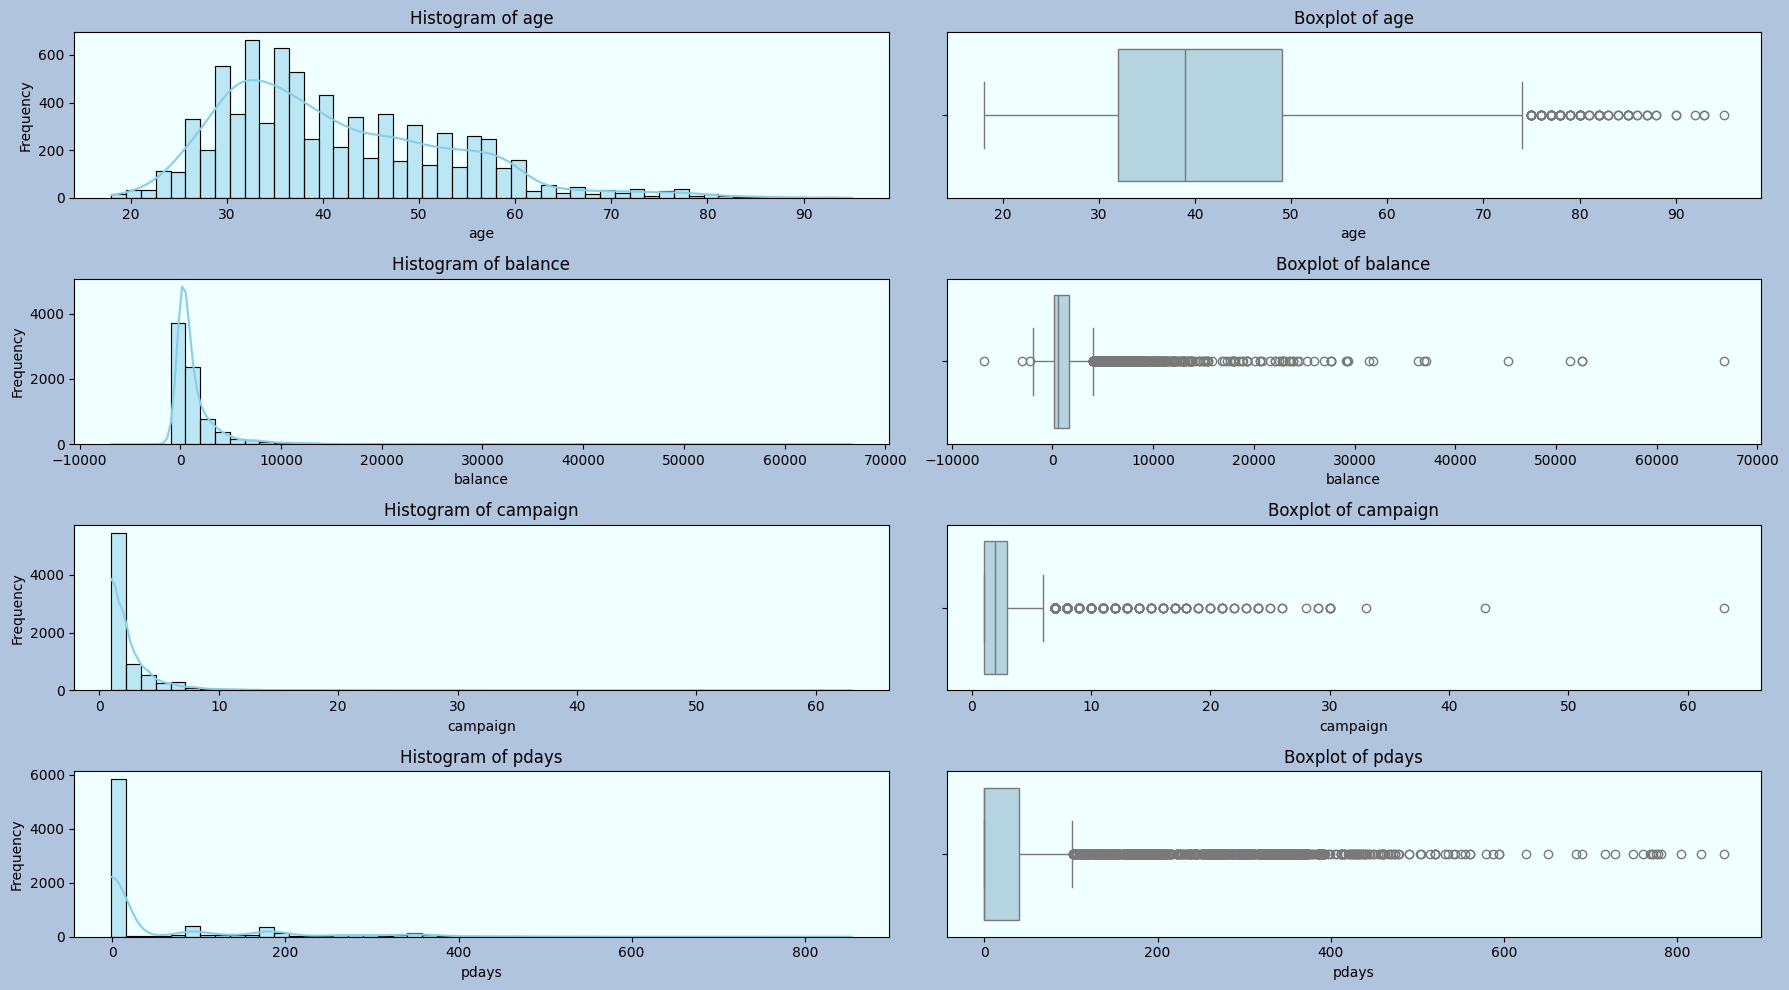

In [126]:
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])

plt.figure(figsize=(18, 10))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='skyblue', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

fig = plt.gcf()
fig.patch.set_facecolor('lightsteelblue')

axes = fig.get_axes()
for ax in axes:
    ax.set_facecolor('azure')

plt.tight_layout()
display(dist_df)
plt.show()

- Semua data numerik pada dataset tidak terdistribusi normal
- Terdapat outliers pada tiap kolom

**Correlation**

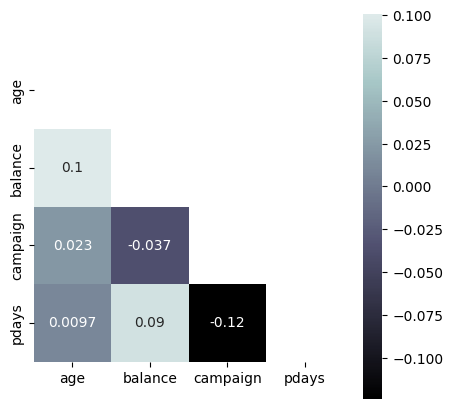

In [127]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(5,5))

corr_matrix = numeric_data.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(data=corr_matrix, annot=True, cmap='bone', center=0, mask=mask, square=True)

plt.show()

>**Insight**
 
 - **age dan balance (0.100600)**: Korelasi positif yang sangat lemah. Ini menunjukkan bahwa usia seseorang sedikit berhubungan dengan saldo akun mereka, tetapi pengaruhnya sangat kecil.

 - **age dan campaign (0.023335)**: Korelasi positif yang sangat lemah. Ini menunjukkan hampir tidak ada hubungan antara usia seseorang dan jumlah kontak yang dilakukan selama kampanye.

 - **age dan pdays (0.009668)**: Korelasi positif yang sangat lemah. Ini menunjukkan hampir tidak ada hubungan antara usia seseorang dan jumlah hari yang berlalu sejak terakhir kali mereka dihubungi.

 - **balance dan campaign (-0.036909)**: Korelasi negatif yang sangat lemah. Ini menunjukkan hampir tidak ada hubungan antara saldo akun seseorang dan jumlah kontak selama kampanye.

 - **balance dan pdays (0.090169)**: Korelasi positif yang sangat lemah. Ini menunjukkan sedikit hubungan antara saldo akun seseorang dan jumlah hari sejak mereka terakhir dihubungi, tetapi pengaruhnya kecil.

 - **campaign dan pdays (-0.124030)**: Korelasi negatif yang lemah. Ini menunjukkan bahwa semakin banyak kontak yang dilakukan selama kampanye, sedikit berkurangnya jumlah hari sejak terakhir kali seseorang dihubungi. Meskipun hubungannya lemah, ada kecenderungan bahwa nasabah yang dihubungi lebih sering cenderung telah dihubungi lebih baru.

#### `Categorical Features`

In [128]:
categorical = list(data.select_dtypes(['object','category']).columns)

**Distribution**

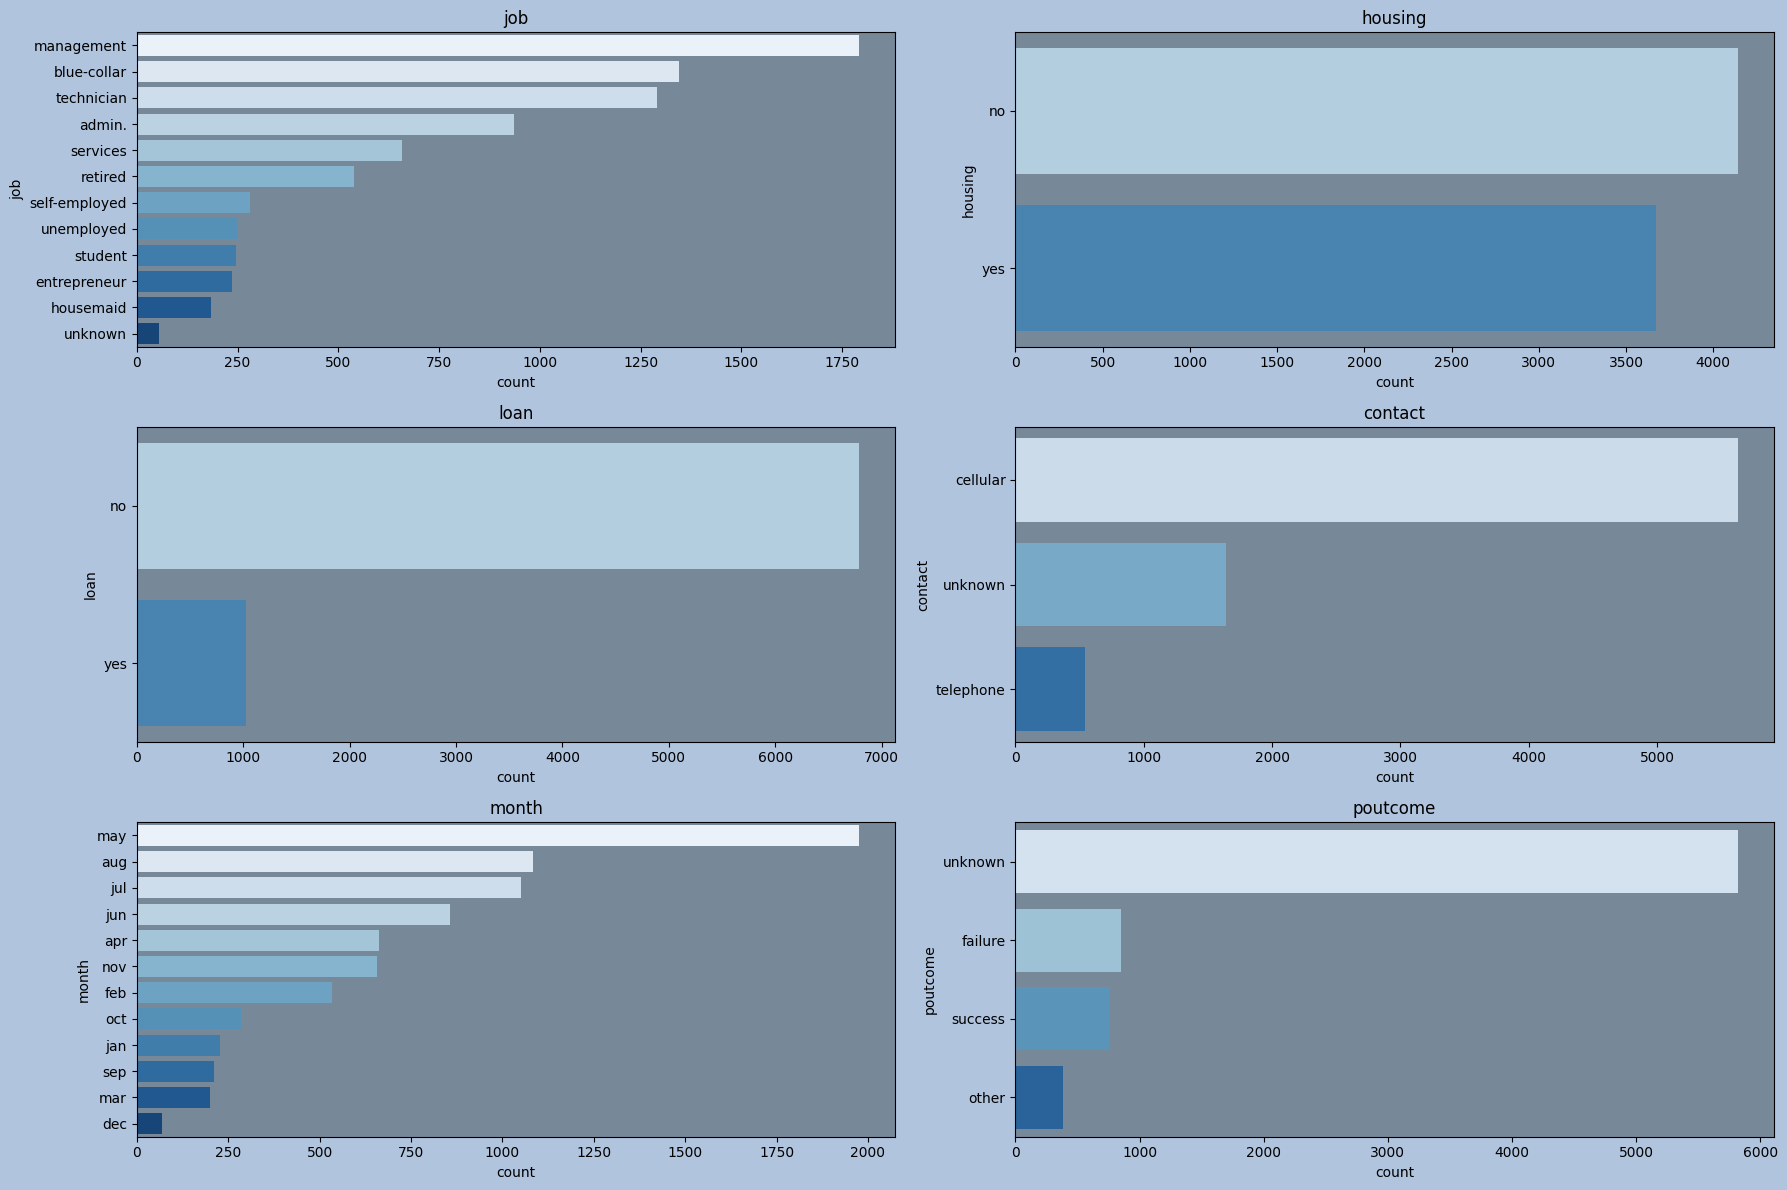

In [129]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12)) 
for i, j in zip(categorical, axes.flatten()):
    ax = sns.countplot(data=data, y= i, ax= j, order=data[i].value_counts().index, palette='Blues')
    ax.set_title(f'{i}', size = 12) 

fig = plt.gcf()
fig.patch.set_facecolor('lightsteelblue')

axes = fig.get_axes()
for ax in axes:
    ax.set_facecolor('lightslategray')

plt.tight_layout()
plt.show()

- Profesi nasabah terbanyak pada dataset yaitu management (manajemen), blue-collar (buruh), technician (teknisi), dan seterusnya
- Proporsi nasabah yang memiliki KPR tidak terlalu signifikan perbedaannya antara yang memiliki dan tidak memiliki KPR,
- Mayoritas nasabah tidak memiliki pinjaman 
- Jenis kontak paling banyak dilakukan untuk melakukan campaign yaitu melalui jenis kontak cellular (seluler),
- Campaign paling banyak dilakukan pada bulan Mei,
- Namun dari semua campaign yang telah dilakukan, hasilnya masih banyak yang belum jelas statusnya (unknown), apakah campaign tersebut berhasil atau tidak.

# **`Data Cleaning, Feature Selection and Feature Engineering`**

#### **Handling Duplicated Data**

In [130]:
duplicates = data.duplicated().sum()
percent_duplicates = data.duplicated().sum()/len(data)*100
print(f'Jumlah duplikat data: {duplicates} ({percent_duplicates:.2f}%)')
data[data.duplicated()]

Jumlah duplikat data: 8 (0.10%)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


- Data yang kita miliki terdapat sedikit duplikat data (8), namun kita tidak dapat menentukan data tersebut merupakan duplikat atau tidak, dikarenakan kita tidak memiliki kolom ID nasabah untuk memastikan bahwa bisa jadi secara kebetulan memiliki informasi yang sama.

#### **Handling Anomaly Data**

>**Mengubah profesi 'admin.' menjadi 'admin'**

In [131]:
data['job'] = data['job'].replace('admin.', 'admin')

>**'unknown' pada Kolom `job`**

In [132]:
value_job = data['job'].value_counts(normalize=True) * 100
percentage_job = value_job.apply(lambda x: f'{x:.2f}')
vj = pd.DataFrame({'Counts': data['job'].value_counts(),'Percentage (%)': percentage_job})

vj

,Counts,Percentage (%)
job,,
management,1792,22.94
blue-collar,1346,17.23
technician,1291,16.52
admin,936,11.98
services,658,8.42
retired,540,6.91
self-employed,280,3.58
unemployed,249,3.19
student,247,3.16


In [133]:
data.drop(data[data['job'] == 'unknown'].index, inplace=True)
data['job'].value_counts()

job
management       1792
blue-collar      1346
technician       1291
admin             936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
Name: count, dtype: int64

- Dikarenakan proporsi values 'unknown' pada kolom job sangat kecil (0.6%) dan tidak berpengaruh signifikan pada proses pengolahan data nantinya, maka kita dapat menhilangkan values tersebut.

>**'unknown' pada Kolom `poutcome`**

In [134]:
data['poutcome'].value_counts()

poutcome
unknown    5779
failure     841
success     754
other       385
Name: count, dtype: int64

In [135]:
data['poutcome'] = data['poutcome'].replace('other', 'unknown')

value_poutcome = data['poutcome'].value_counts(normalize=True) * 100
percentage_poutcome = value_poutcome.apply(lambda x: f'{x:.2f}')
vp = pd.DataFrame({'Counts': data['poutcome'].value_counts(),'Percentage (%)': percentage_poutcome})

vp

,Counts,Percentage (%)
poutcome,,
unknown,6164,79.44
failure,841,10.84
success,754,9.72


 - Values 'other' pada kolom `poutcome` dapat diartikan dalam dataset ini memiliki kondisi yang sama dengan values 'unknown', kedua values tersebut sama-sama tidak tahu apakah mereka berhasil atau gagal dari hasil campaign yang dilakukan sebelumnya. Oleh karena itu, kedua values tersebut dapat digabungkan untuk proses machine learning.

>**'unknown' pada kolom `contact`**

In [136]:
value_contact = data['contact'].value_counts(normalize=True) * 100
percentage_contact = value_contact.apply(lambda x: f'{x:.2f}')
vc = pd.DataFrame({'Counts': data['contact'].value_counts(),'Percentage (%)': percentage_contact})

vc

,Counts,Percentage (%)
contact,,
cellular,5592,72.07
unknown,1631,21.02
telephone,536,6.91


- pada kolom `contact` terdapat value 'unknown' yang dimana kita tidak tahu apakah nasabah tersebut dihubungi dengan melalui cellular atau telephone, maka untuk proses kedepannya kita akan membiarkan value tersebut unknown saja atau dapat kita artikan value tersebut berupa missing value.

>**Negative Balance pada kolom `balance`**

In [137]:
data[data['balance']<0]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
5,41,admin,-76,yes,no,cellular,apr,1,-1,unknown,no
59,50,admin,-194,yes,no,cellular,apr,2,-1,unknown,no
65,31,services,-327,yes,no,unknown,may,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7712,40,management,-63,no,yes,cellular,jul,1,-1,unknown,no
7757,33,technician,-479,no,no,cellular,aug,1,-1,unknown,no
7758,57,retired,-157,no,no,cellular,aug,9,-1,unknown,no
7763,28,management,-994,yes,yes,cellular,jul,2,-1,unknown,no


In [138]:
data.drop(data[data['balance'] < 0].index, inplace=True)

 - Pada kolom balance (saldo) terdapat nilai yang negatif, untuk kasus ini bersifat tidak wajar dan tidak mungkin nasabah memiliki saldo yang minus di dalam tabungan bank nya. Maka, kita dapat menghapus values tersebut dari data.

>**'-1' value pada kolom `pdays`**

In [139]:
(len(data[data['pdays']==-1]), len(data[data['pdays']==0]), len(data[data['pdays']>=1]))

(5363, 0, 1917)

In [140]:
data['pdays']=np.where(data['pdays']==-1,'no','yes')
data.rename(columns={'pdays': 'iscontacted'}, inplace=True)

 - Kolom `pdays` di dataset ini berisi values yang merepresentasikan jumlah hari setelah nasabah dihubungi dari kampanye sebelumnya. Pada kolom ini, terdapat values bernilai '-1' yang tidak memungkinkan terdapat jumlah hari yang bernilai negatif dan dapat diartikan nasabah tersebut belum menerima campaign dari pihak tim marketing. Oleh karena itu, pada kolom tersebut values '-1' yang artinya belum menerima dan diatas sama dengan 1 yang artinya sudah menerima campaign, disini kita dapat mengganti values '-1' menjadi 'no' dan values diatas sama dengan 1 menjadi 'yes' agar mempermudah proses encoding nantinya. Dengan pergantian values tersebut, maka nama kolom pun perlu digantikan dengan 'iscontacted'

#### **Outliers**

In [141]:
def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

numerical = [var for var in data.columns if data[var].dtypes != 'object']

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(data, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(data[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df

,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,age,118,1.62,6.5,74.5
1,balance,672,9.23,-2240.5,4227.5
2,campaign,387,5.32,-2.0,6.0


- Berdasarkan tabel di atas, kita dapat melihat bahwa ada beberapa features yang memiliki outliers, yaitu `age`, `balance` dan `campaign`.
- Untuk mengatasi outliers tersebut, kita akan melakukan handling outlier dengan menggunakan winsorizer


#### **Collinearity**

In [142]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

In [143]:
vif_df = calculate_vif(data[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(data[numerical].drop(columns=dropped_columns))

In [144]:
display(dropped_columns, vif_df)

[]

,Feature,VIF
0,age,2.012542
2,campaign,1.738752
1,balance,1.277480


- Tidak terdapat multicollinearity (< 10) pada dataset, sehingga kita tidak perlu mengurangi feature untuk memperbaiki nilai Collinearity tersebut.

#### **Cardinality**

In [145]:
categorical = [var for var in data.drop(columns='deposit').columns if data[var].dtypes == 'object']

In [146]:
# creating a function to check cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(data)

Cardinality of job: 11
Cardinality of housing: 2
Cardinality of loan: 2
Cardinality of contact: 3
Cardinality of month: 12
Cardinality of iscontacted: 2
Cardinality of poutcome: 3


- Pada `job` dan `month` terdeteksi High Cardinality, dimana kolom tersebut memiliki values lebih dari 10,
- Nantinya kolom tersebut akan dilakukan proses binary encoding untuk kolom `job` dan `month` menggunakan ordinal encoding dikarenakan values pada kolom `month` bersifat ordinal (memiliki urutan).  

# **`Features vs Target`**

#### **Numerical Features**

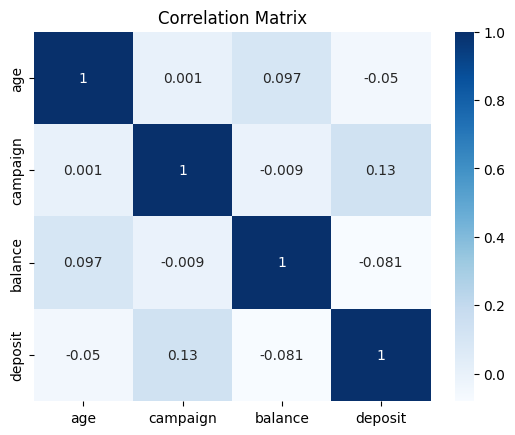

In [147]:
# Korelasi Pearson untuk kolom numerikal
data2= data.copy()
data2['deposit'] = np.where(data2['deposit']=='yes',0,1).astype('int64')  
corr = data2[['age', 'campaign', 'balance', 'deposit']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

>**Insight**

Berikut merupakan korelasi antara fitur-fitur numerikal dengan target:
1. **Age (Usia)**: -0.049540 (sangat lemah, negatif), Usia nasabah tidak signifikan mempengaruhi keputusan untuk melakukan deposit.
2. **Balance (Saldo Nasabah)**: 0.133306 (lemah, positif), Nasabah dengan saldo rendah cenderung tidak melakukan deposit.
3. **Campaign (Frekuensi Kampanye)**: -0.080829 (lemah, negatif), Terlalu sering menghubungi nasabah sedikit mengurangi kemungkinan melakukan deposit.

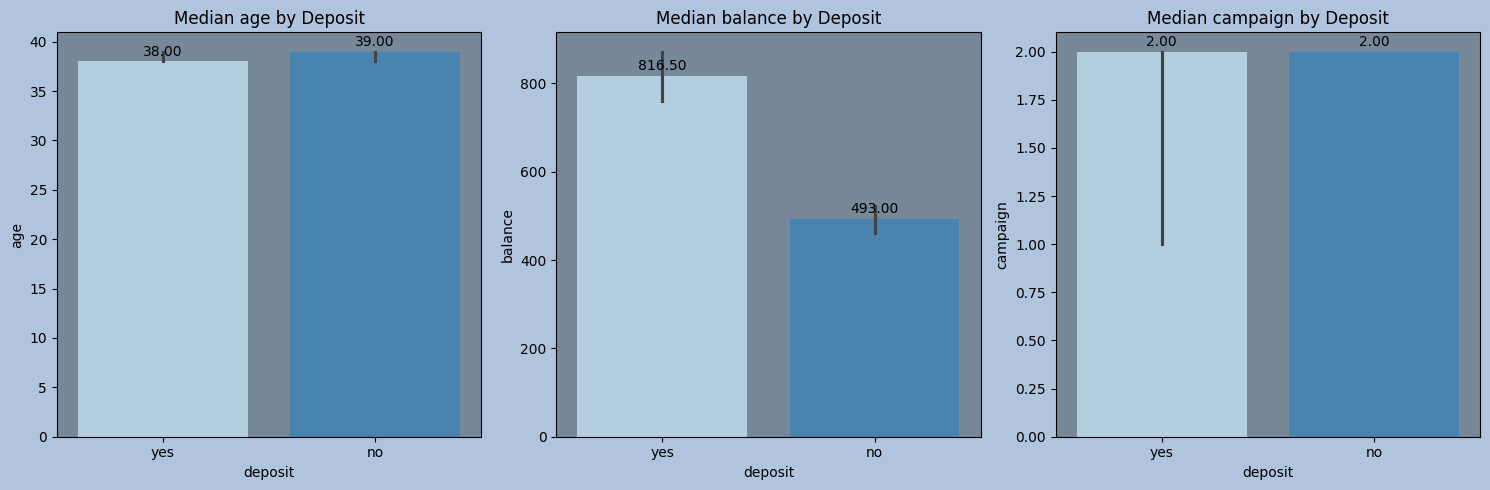

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for col, ax in zip(numerical, axes.flatten()):
    sns.barplot(data=data, y=col, x='deposit', estimator=np.median, ax=ax, palette='Blues')
    ax.set_title(f'Median {col} by Deposit')
    
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 7), 
                    textcoords='offset points',
                    ha='center', va='center')
fig.patch.set_facecolor('lightsteelblue')  
for ax in axes:
    ax.set_facecolor('lightslategray')

plt.tight_layout()
plt.show()

- Grafik di atas menunjukan rata-rata (median) dari karakteristik berdasarkan usia, saldo, dan berapa kali campaign dilakukan terhadap nasabah yang melakukan deposit dan tidak.
- Rata-rata nasabah yang melakukan deposit berusia 38 tahun, dan yang tidak melakukan deposit berusia 39 tahun,
- Rata-rata saldo nasabah yang melakukan deposit sebesar $816,50 dan yang tidak melakukan deposit memiliki saldo $493,
- Rata-rata campaign yang dilakukan terhadap nasabah yang deposit dan yang tidak deposit sebanyak 2 lali.

#### **Categorical Features**

In [149]:
def create_plot(data, col, x_maks=1000):
    # Generate the aggregated table
    agg_table = data.groupby([col, 'deposit']).size().unstack(fill_value=0).reset_index()
    agg_table['total'] = agg_table['yes'] + agg_table['no']
    agg_table['% deposit'] = (agg_table['yes'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% deposit', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Plot the percentage of deposit customers
    ax1 = sns.barplot(data=agg_table, y=col, x='% deposit', ax=axes[0], palette='Blues')
    if ax1.containers:
        for container in ax1.containers:
            labels = [f'{w:.1f} %' for w in container.datavalues]
            ax1.bar_label(container, labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of deposit customers by {col}')

    # Plot the number of customers by deposit status
    ax2 = sns.countplot(data=data, y=col, hue='deposit', order=agg_table[col], ax=axes[1], palette='Blues')
    if ax2.containers:
        for container in ax2.containers:
            ax2.bar_label(container)
    ax2.set_title(f'Number of customers by {col} and deposit')
    ax2.set_xlim(0, x_maks)

    # Set the background colors
    fig.patch.set_facecolor('lightsteelblue')
    for ax in axes:
        ax.set_facecolor('lightslategray')

    plt.tight_layout()
    plt.show()

In [150]:
data.columns

Index(['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month',
       'campaign', 'iscontacted', 'poutcome', 'deposit'],
      dtype='object')

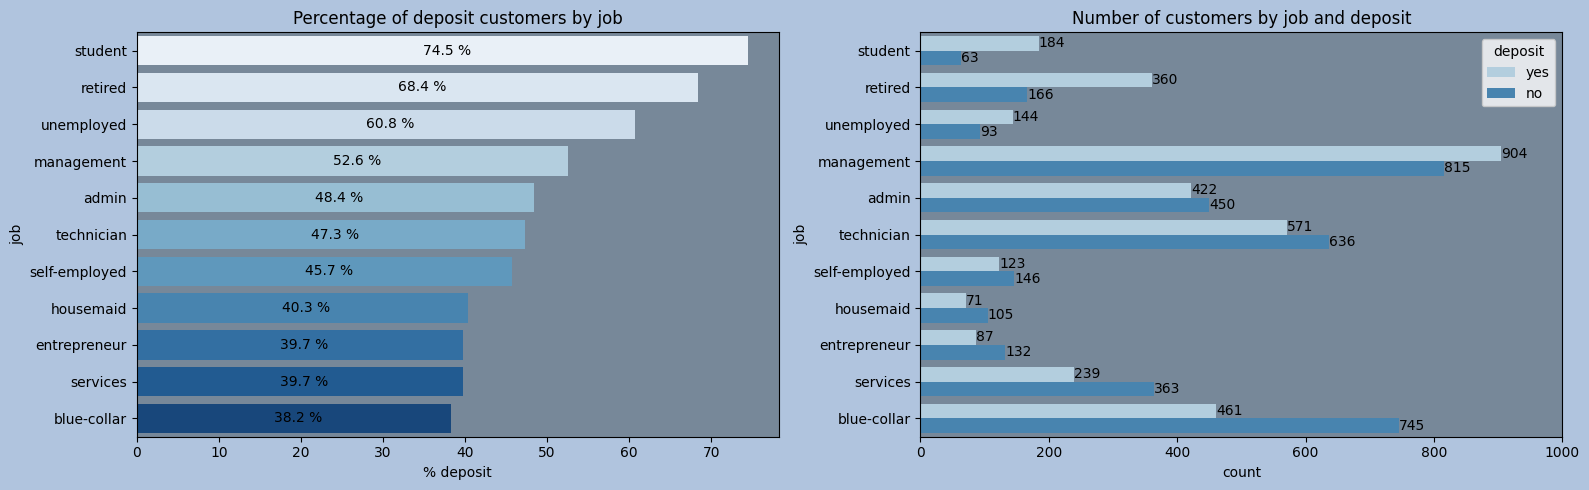

In [151]:
create_plot(data, 'job', x_maks=1000)

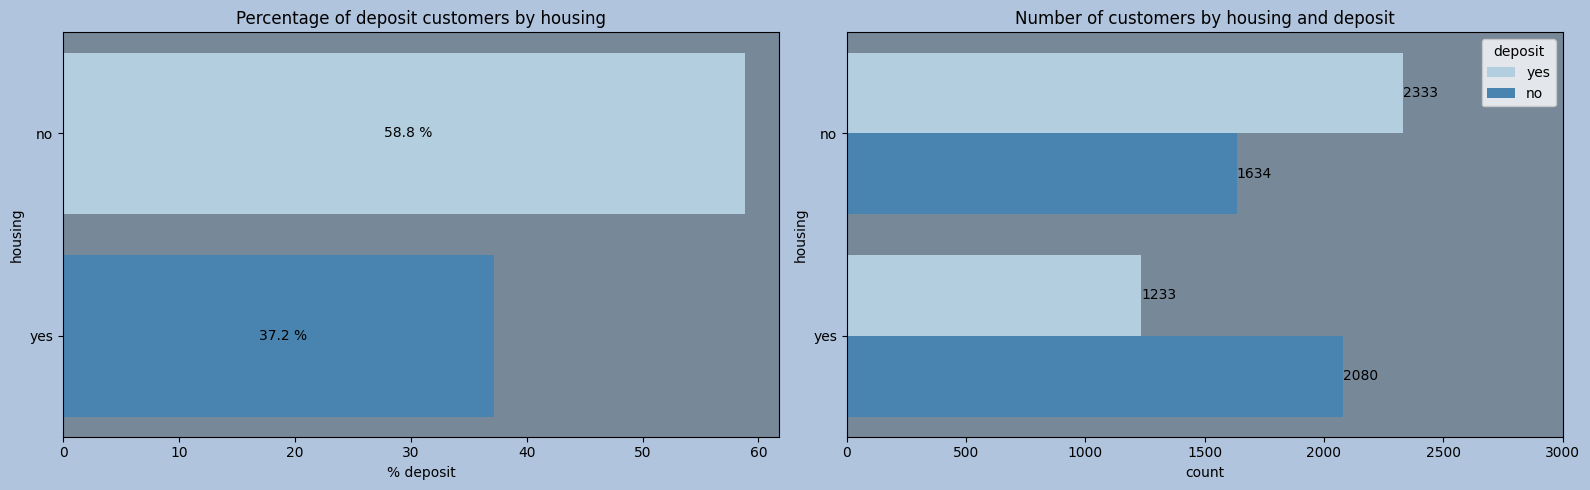

In [152]:
create_plot(data, 'housing', x_maks=3000)

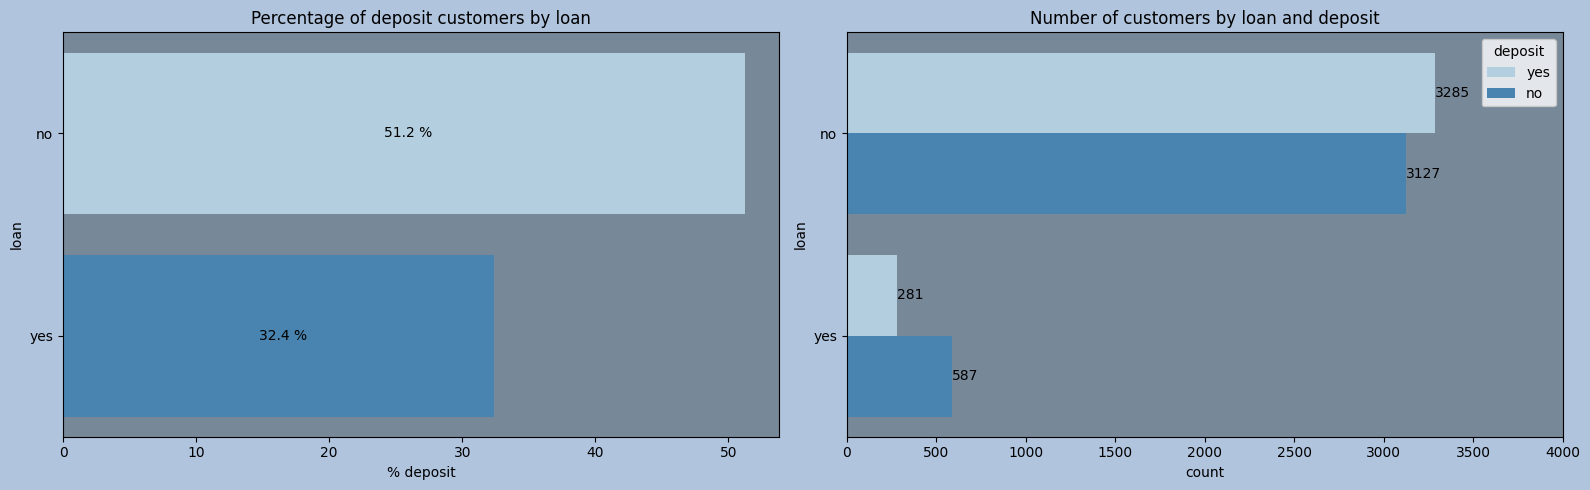

In [153]:
create_plot(data, 'loan', x_maks=4000)

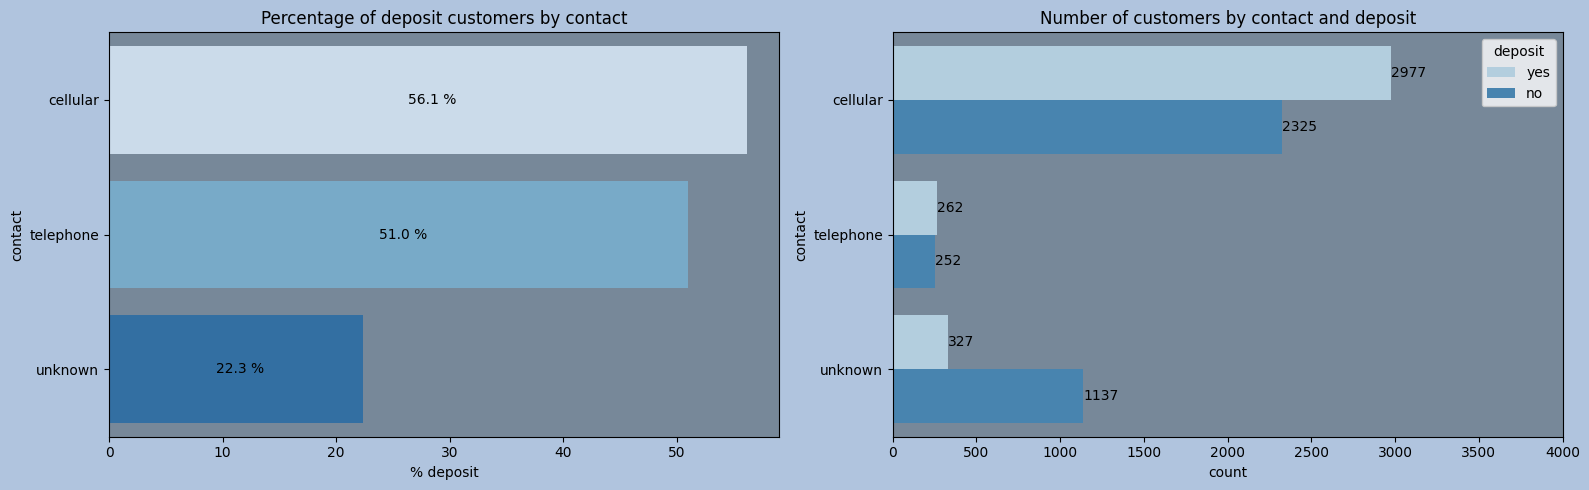

In [154]:
create_plot(data, 'contact', x_maks=4000)

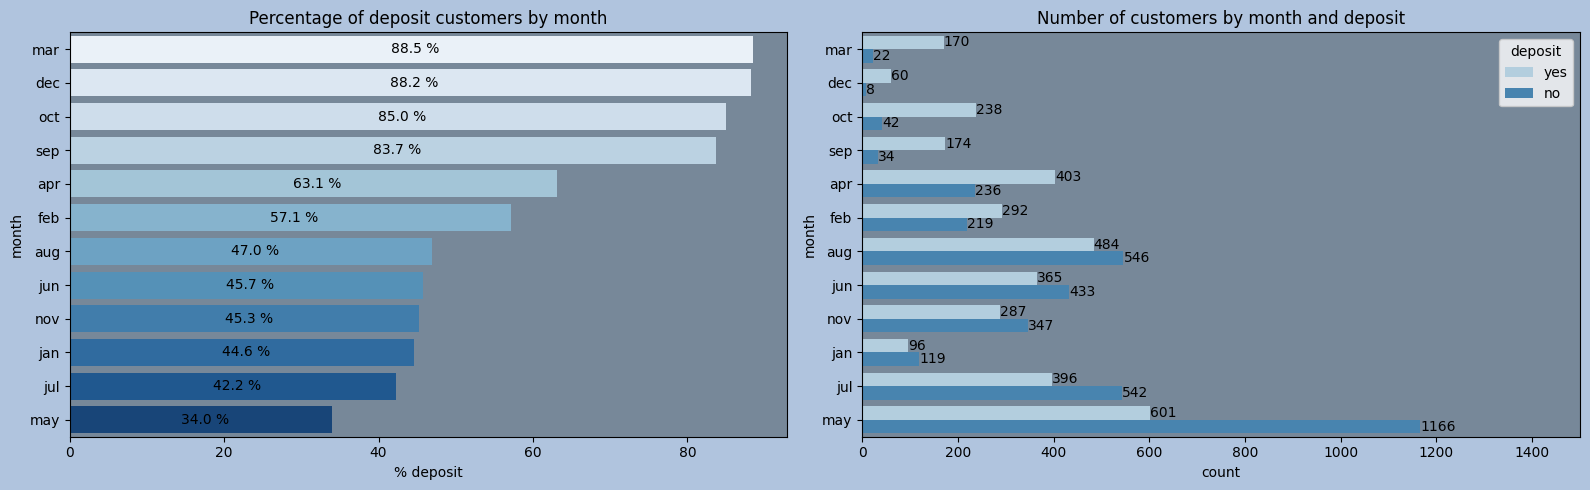

In [155]:
create_plot(data, 'month', x_maks=1500)

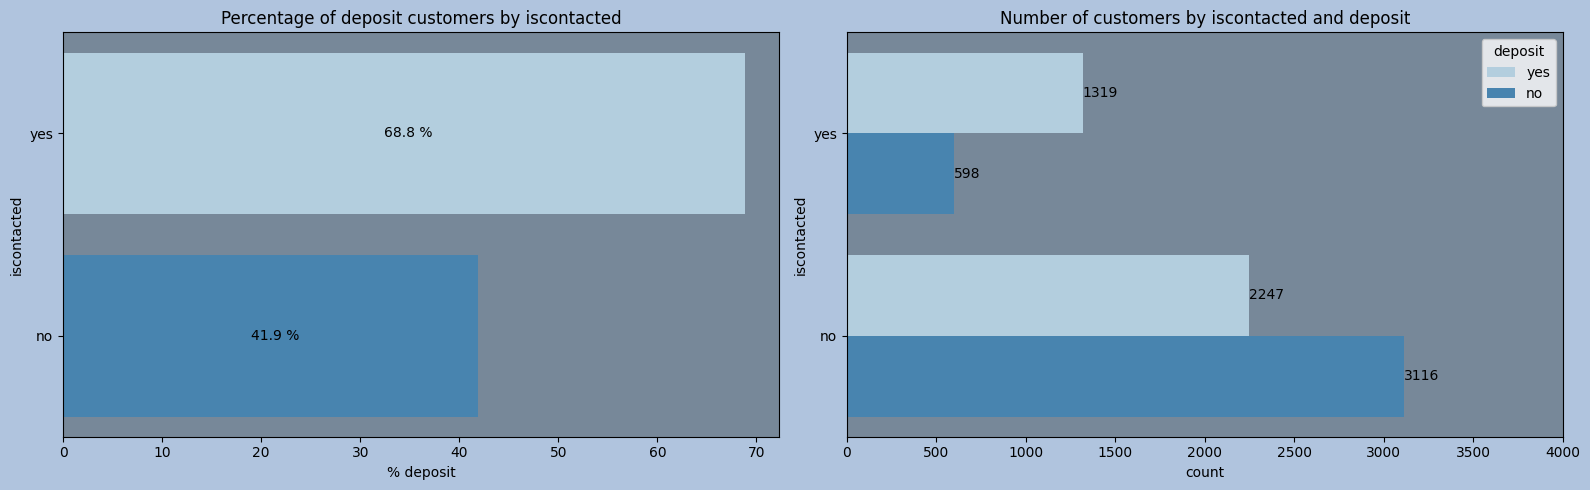

In [156]:
create_plot(data, 'iscontacted', x_maks=4000)

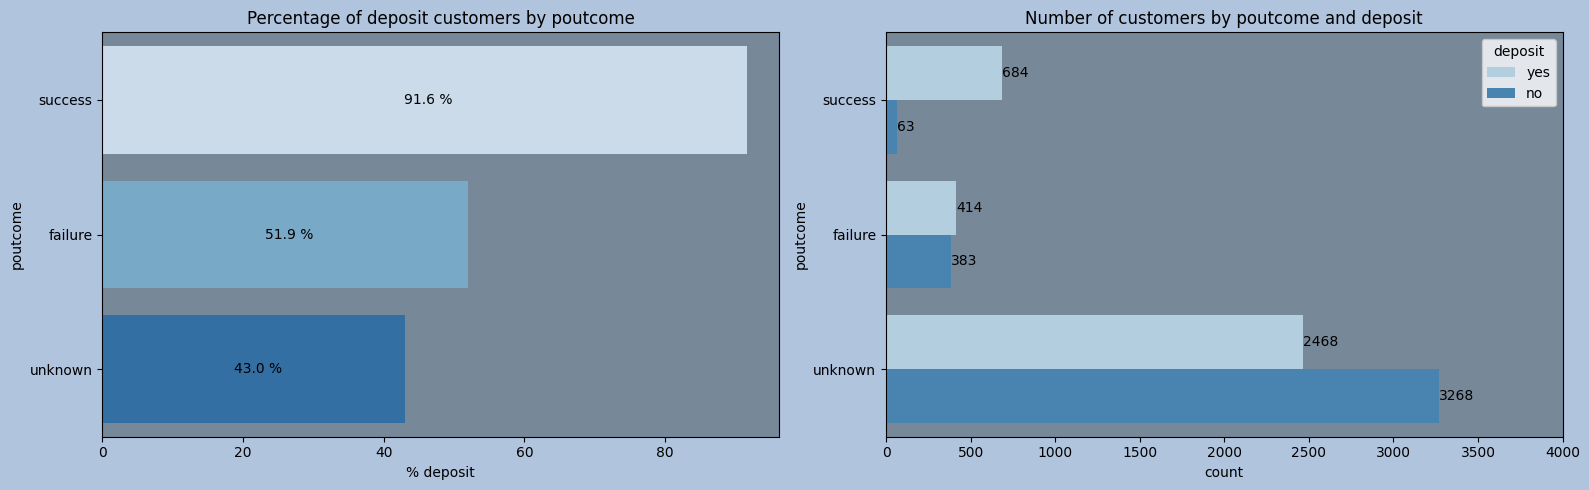

In [157]:
create_plot(data, 'poutcome', x_maks=4000)

In [158]:
from scipy.stats import chi2_contingency

categorical_columns = ['job', 'housing', 'loan', 'contact', 'month', 'iscontacted', 'poutcome']
target = 'deposit'

results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(data[col], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    if p < 0.05:
        relationship = 'Significant'
    else:
        relationship = 'Not Significant'
    results.append({'Column': col, 'Chi2': chi2, 'P-value': p, 'Relationship': relationship})

chi2_results_data = pd.DataFrame(results)
chi2_results_data

,Column,Chi2,P-value,Relationship
0,job,258.108377,1.068858e-49,Significant
1,housing,335.976883,4.797877e-75,Significant
2,loan,108.051723,2.618546e-25,Significant
3,contact,525.736830,6.881735e-115,Significant
4,month,657.664636,6.359649e-134,Significant
5,iscontacted,408.067946,9.653559e-91,Significant
6,poutcome,626.284844,1.009192e-136,Significant


>**Insight**

- Semua feature kategorikal memiliki hubungan yang signifikan dengan target,
- **Job**: 'student' memiliki persentase terbesar (74,5%) dalam melakukan deposit, namun bila dilihat dari segi peminat, nasabah terbanyak yaitu berprofesi 'management' namun cenderung tidak tertarik untuk melakukan deposit.
- **Housing**: nasabah yang memiliki pinjaman KPR memiliki persentase yang lebih besar dalam kecenderungan tidak melakukan deposit dibandingkan nasabah yang tidak memiliki pinjaman KPR. 
- **Loan**: mayoritas nasabah yang memiliki pinjaman (selain KPR) lebih cenderung tidak melakukan deposit.
- **Contact**: jenis kontak campaign paling banyak dilakukan melalui 'cellular', dan dari jenis kontak tersebut paling banyak melakukan deposit dan tidak deposit.
- **Month**: campaign paling banyak dilakukan pada bulan Mei, namun dari segi persentase keberhasilan campaign pada bulan tersebut banyak nasabah yang gagal melakukan deposit.
- **Iscontacted**: mayoritas nasabah belum dihubungi untuk diberikan campaign dan cenderung tidak melakukan deposit
- **Poutcome**: dari segi keberhasilan campaign yang dilakukan sekitar 80% campaign statusnya 'unknown' atau dapat diartikan belum jelas apakah campaign yang dilakukan berhasil atau tidak. 

#### **Check Balance Data**

In [159]:
# Check the class distribution 
from collections import Counter

print("Class distribution:", Counter(data['deposit']))

Class distribution: Counter({'no': 3714, 'yes': 3566})


In [160]:
data['deposit'].value_counts(normalize=True)*100

deposit
no     51.016484
yes    48.983516
Name: proportion, dtype: float64

- Proporsi target pada data cukup seimbang (balance). Dikarenakan persentasi yang ditunjukan dari proporsi kelas dari target sebesar 51% dan 49%, yang dapat diartikan tidak memenuhi kriteria data yang bersifat tidak seimbang (imbalance). 
Sumber: ([Imbalance Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)) 

# **`Modelling`**

#### **Data Preparation**

>**Handling Outliers**

- Untuk handling outliers pada kolom `age`, `balance`, dan `campaign` nantinya akan kita coba menggunakan `winsorizing` agar mempertahankan distribusi data dan mengurangi dampak dari nilai ekstrem yang dapat mendistorsi model machine learning
- Pada proses ini kita menggunakan winsorizer, dikarenakan Winsorisasi atau winorization merupakan transformasi statistik dengan membatasi nilai ekstrem dalam data statistik untuk mengurangi pengaruh kemungkinan outlier palsu. [Sumber](https://en.wikipedia.org/wiki/Winsorizing)

>**Encoding**

In [161]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in categorical[:-1] :
    listItem.append( [col, data[col].nunique(), data.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,job,11,"[admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed]"
1,housing,2,"[no, yes]"
2,loan,2,"[no, yes]"
3,contact,3,"[cellular, telephone, unknown]"
4,month,12,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]"
5,iscontacted,2,"[no, yes]"


- Nantinya kita akan melakukan encoding pada kolom housing, loan, contact, iscontacted, dan poutcome menggunakan `One Hot Encoding` karena fitur-fitur tersebut tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit
- untuk kolom job menggunakan `Binary Encoding`, karena fitur ini tidak memiliki urutan/tidak ordinal, namun jumlah unique datanya banyak
- untuk kolom month menggunakan `Ordinal Encoding`, karena fitur ini memiliki urutan.

>**Scaling**

- Kita akan menggunakan `Robust Scaler` karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

>**Balance Data**

- Seperti yang sudah kita ketahui, proporsi target pada dataset ini sudah cukup seimbang (balance), hal tersebut memudahkan kita untuk proses kedepannya. Kita tidak ada kebutuhan mendesak untuk melakukan oversampling maupun undersampling.

>**Change Target Value**

In [162]:
# mengubah values target menjadi binary 1 dan 0
data['deposit'] = np.where(data['deposit']=='yes',0,1).astype('int64')

>#### **Define Features (X) and Target (y)**

In [163]:
# Features
X = data.drop(columns='deposit')

# target
y = data['deposit']

>#### **Data Splitting**

In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020, stratify=y
)

In [165]:
y_train.value_counts() / len(y_train)

deposit
1    0.51013
0    0.48987
Name: count, dtype: float64

## **Model Benchmarking**

>**Inisiasi Handling Outliers**

In [166]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

In [167]:
# Outlier Handling
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from scipy.stats.mstats import winsorize
from typing import Literal

class HandlingOutliers(BaseEstimator, TransformerMixin, OneToOneFeatureMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        return self 
    
    def transform(self, X, y=None):
        data = X.copy()
        data['age'] = pd.Series(winsorize_with_pandas(data['age'], limits=(0.01, 0.01)))
        data['balance'] = pd.Series(winsorize_with_pandas(data['balance'], limits=(0.01, 0.01)))
        data['campaign'] = pd.Series(winsorize_with_pandas(data['campaign'], limits=(0.01, 0.01)))
        return data
    
    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

>**Inisiasi Scaler, Kolom Transfomer, dan Model**

In [168]:
scaler = RobustScaler()

ordinal_mapping = [{'col':'month', 'mapping':{None:0,'jan':1,'feb':2,'mar':3,'apr':4, 'may':5, 
                    'jun':6,'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}}]

encode = ColumnTransformer([
    ('onehot',OneHotEncoder(),['housing', 'loan', 'contact', 'iscontacted', 'poutcome']),
    ('binary', BinaryEncoder(), ['job']),
    ('ordinal', OrdinalEncoder(cols=['month'], mapping=ordinal_mapping), ['month'])
],remainder='passthrough')

# Definisikan model-model yang akan digunakan
logreg =LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dt= DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
lgb = LGBMClassifier(random_state=0, verbose=0)
cat = CatBoostClassifier(verbose=False,random_state=0)

models = [logreg,knn,dt,rf,ada,gb,xgb,lgb, cat]

>#### **Cross Validation**

In [169]:
list_mean = []
list_std = []
model_name = []

for model in models:

    # define Pipeline
    model_pipeline = ImbPipeline([
        ('HandlingOutliers', HandlingOutliers()),
        ('preprocessing', encode),
        ('scaling', scaler),
        ('model', model)
    ])

    # define cross-val
    model_cv = cross_val_score(
        model_pipeline,
        X_train,
        y_train,
        cv = 5,
        scoring= 'f1',
        n_jobs=-1,
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    model_name.append(model.__class__.__name__)

cv = pd.DataFrame({
    'model' : model_name,
    'mean_f1score' : list_mean,
    'std_f1score' : list_std,
    }).sort_values('mean_f1score', ascending=False)

cv

,model,mean_f1score,std_f1score
5,GradientBoostingClassifier,0.745222,0.009099
8,CatBoostClassifier,0.741186,0.011169
7,LGBMClassifier,0.735165,0.010477
4,AdaBoostClassifier,0.724240,0.011238
3,RandomForestClassifier,0.712635,0.008160
6,XGBClassifier,0.712302,0.009350
0,LogisticRegression,0.689589,0.008942
1,KNeighborsClassifier,0.675228,0.013257
2,DecisionTreeClassifier,0.632255,0.006499


#### **Hyperparameter Tuning**

> **Hyperparameter Tuning on Test Set**

In [170]:
scores = []
model_name = []

for model in models:

    # define Pipeline
    model_pipeline = ImbPipeline([
        ('HandlingOutliers', HandlingOutliers()),
        ('preprocessing', encode),
        ('scaling', scaler),
        ('model', model)
    ])

    model_pipeline.fit(X_train,y_train)
    y_pred = model_pipeline.predict(X_test)

    score = f1_score(y_test,y_pred)
    scores.append(score)
    model_name.append(model.__class__.__name__)

val = pd.DataFrame({
    'model' : model_name,
    'F1 score (validation set)' : list_mean,
    'F1 score (test set)' : scores
}).sort_values('F1 score (test set)', ascending=False)

val

,model,F1 score (validation set),F1 score (test set)
5,GradientBoostingClassifier,0.745222,0.734324
8,CatBoostClassifier,0.741186,0.732268
7,LGBMClassifier,0.735165,0.724619
6,XGBClassifier,0.712302,0.709889
4,AdaBoostClassifier,0.724240,0.700990
0,LogisticRegression,0.689589,0.683544
3,RandomForestClassifier,0.712635,0.675000
1,KNeighborsClassifier,0.675228,0.674572
2,DecisionTreeClassifier,0.632255,0.615591


> **Hyperparameter Tuning: *GradientBoostingClassifier***

In [171]:
hyperparam_space = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2', None]
}

pipe_model = ImbPipeline([
        ('HandlingOutliers', HandlingOutliers()),
        ('preprocessing', encode),
        ('model', gb)          
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gb_tuning = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring= 'f1',
    n_jobs= -1,
    n_iter= 100,
    random_state= 0
)

gb_tuning.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('HandlingOutliers',
                                              HandlingOutliers()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'iscontacted',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job']),
                                                                              ('ordinal',
                                                                               Ordina...
                                              GradientBoostingClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.001, 0.01,
                                                                 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [3, 4, 5, 6],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 200,
                                                                300]},
                   random_state=0, scoring='f1')

In [172]:
print(f'Parameter terbaik pada GradientBoost: {gb_tuning.best_params_}')
print(f'Score terbaik pada GradientBoost: {gb_tuning.best_score_}')

Parameter terbaik pada GradientBoost: {'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 6, 'model__learning_rate': 0.001}
Score terbaik pada GradientBoost: 0.7479723310997861


In [173]:
tuned_gb = gb_tuning.best_estimator_
tuned_gb.fit(X_train,y_train)
y_pred_gb = tuned_gb.predict(X_test)
print(f'{f1_score(y_test,y_pred_gb)}')

0.7390817469204927


> **Hyperparameter Tuning: *CATBoostClassifier***

In [174]:
hyperparam_space = {
    'model__depth': range(1, 11),
    'model__learning_rate': [0.001,0.01, 0.1],
    'model__iterations': range(100, 200, 25),
    'model__l2_leaf_reg': [1, 3, 5, 7, 9]
}

pipe_model = ImbPipeline([
        ('HandlingOutliers', HandlingOutliers()),
        ('preprocessing', encode),
        ('model', cat)          
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

cat_tuning = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring= 'f1',
    n_jobs= -1,
    n_iter= 100,
    random_state= 0
)

cat_tuning.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('HandlingOutliers',
                                              HandlingOutliers()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'iscontacted',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job']),
                                                                              ('ordinal',
                                                                               Ordina...
apr      4
may      5
jun      6
jul      7
aug      8
sep      9
oct     10
nov     11
dec     12
dtype: int64}]),
                                                                               ['month'])])),
                                             ('model',
                                              <catboost.core.CatBoostClassifier object at 0x0000024D31E94CB0>)]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__depth': range(1, 11),
                                        'model__iterations': range(100, 200, 25),
                                        'model__l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'model__learning_rate': [0.001, 0.01,
                                                                 0.1]},
                   random_state=0, scoring='f1')

In [175]:
print(f'Parameter terbaik pada CatBoost: {cat_tuning.best_params_}')
print(f'Score terbaik pada CatBoost: {cat_tuning.best_score_}')

Parameter terbaik pada CatBoost: {'model__learning_rate': 0.1, 'model__l2_leaf_reg': 9, 'model__iterations': 175, 'model__depth': 4}
Score terbaik pada CatBoost: 0.7476410132595014


In [176]:
tuned_cat = cat_tuning.best_estimator_
tuned_cat.fit(X_train,y_train)
y_pred_cat = tuned_cat.predict(X_test)
print(f'{f1_score(y_test,y_pred_cat)}')

0.7382465057179162


> **Hyperparameter Tuning: *LGBMClassifier***

In [177]:
hyperparam_space = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'model__max_depth': [3, 4, 5, 6, 7],
    'model__num_leaves': [20, 30, 40, 50],
    'model__min_child_samples': [10, 20, 30, 40],
}

pipe_model = ImbPipeline([
        ('HandlingOutliers', HandlingOutliers()),
        ('preprocessing', encode),
        ('model', lgb)          
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lgb_tuning = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring= 'f1',
    n_jobs= -1,
    n_iter= 100,
    random_state= 0
)

lgb_tuning.fit(X_train, y_train)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('HandlingOutliers',
                                              HandlingOutliers()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'iscontacted',
                                                                                'poutcome']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['job']),
                                                                              ('ordinal',
                                                                               Ordina...
dec     12
dtype: int64}]),
                                                                               ['month'])])),
                                             ('model',
                                              LGBMClassifier(random_state=0,
                                                             verbose=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.001, 0.01,
                                                                 0.1, 0.2,
                                                                 0.3],
                                        'model__max_depth': [3, 4, 5, 6, 7],
                                        'model__min_child_samples': [10, 20, 30,
                                                                     40],
                                        'model__n_estimators': [50, 100, 200,
                                                                300],
                                        'model__num_leaves': [20, 30, 40, 50]},
                   random_state=0, scoring='f1')

In [178]:
print(f'Parameter terbaik pada LGMBoost: {lgb_tuning.best_params_}')
print(f'Score terbaik pada LGBMBoost: {lgb_tuning.best_score_}')

Parameter terbaik pada LGMBoost: {'model__num_leaves': 50, 'model__n_estimators': 50, 'model__min_child_samples': 10, 'model__max_depth': 3, 'model__learning_rate': 0.3}
Score terbaik pada LGBMBoost: 0.7431655951546258


In [179]:
tuned_lgb = lgb_tuning.best_estimator_
tuned_lgb.fit(X_train,y_train)
y_pred_lgb = tuned_lgb.predict(X_test)
print(f'{f1_score(y_test,y_pred_lgb)}')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0.7380497131931166


#### **Tuning Results: Before and After Hyperparameter Tuning**

In [180]:
# membuat tabulasi f1 score
results = pd.DataFrame({
    'GradientBoosting' : [list_mean[5], gb_tuning.best_score_, val.iloc[1][2], f1_score(y_test, y_pred_gb), gb_tuning.best_params_],
    'CatBoost' : [list_mean[8], cat_tuning.best_score_, val.iloc[0][2], f1_score(y_test, y_pred_cat), cat_tuning.best_params_],
    'LGBMBoost' : [list_mean[7], lgb_tuning.best_score_, val.iloc[2][2], f1_score(y_test, y_pred_lgb), lgb_tuning.best_params_]
})

set = ['Train Set', 'Train Set', 'Test Set', 'Test Set', '']
model = ['Benchmark Model', 'Tuning Model', 'Benchmark Model', 'Tuning Model','Best Parameters']
position = list(zip(set, model))
multi = pd.MultiIndex.from_tuples(position)
results.index = multi

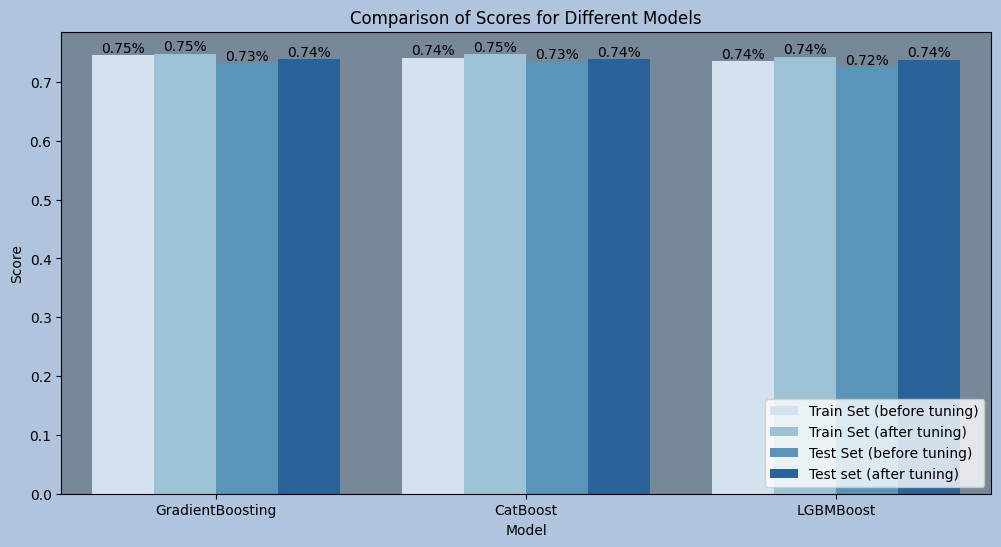

None

,GradientBoosting,CatBoost,LGBMBoost
Train Set (before tuning),0.745222,0.741186,0.735165
Train Set (after tuning),0.747972,0.747641,0.743166
Test Set (before tuning),0.732268,0.734324,0.724619
Test set (after tuning),0.739082,0.738247,0.73805
Best Parameters,"{'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 6, 'model__learning_rate': 0.001}","{'model__learning_rate': 0.1, 'model__l2_leaf_reg': 9, 'model__iterations': 175, 'model__depth': 4}","{'model__num_leaves': 50, 'model__n_estimators': 50, 'model__min_child_samples': 10, 'model__max_depth': 3, 'model__learning_rate': 0.3}"


In [181]:
result = pd.DataFrame({
    'GradientBoosting' : [list_mean[5], gb_tuning.best_score_, val.iloc[1][2], f1_score(y_test, y_pred_gb), gb_tuning.best_params_],
    'CatBoost' : [list_mean[8], cat_tuning.best_score_, val.iloc[0][2], f1_score(y_test, y_pred_cat), cat_tuning.best_params_],
    'LGBMBoost' : [list_mean[7], lgb_tuning.best_score_, val.iloc[2][2], f1_score(y_test, y_pred_lgb), lgb_tuning.best_params_]
}, index=['Train Set (before tuning)', 'Train Set (after tuning)', 'Test Set (before tuning)', 'Test set (after tuning)', 'Best Parameters'])

plot_data = result.drop('Best Parameters').transpose().melt(var_name='Metrics', value_name='Score', ignore_index=False)
plot_data.reset_index(inplace=True)
plot_data.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=plot_data, x='Model', y='Score', hue='Metrics', palette='Blues')
plt.title('Comparison of Scores for Different Models')
plt.ylabel('Score')

plt.gca().set_facecolor('lightslategray')
plt.gcf().set_facecolor('lightsteelblue')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
display(plt.show(), result)

>**Insight**

- Terlihat bahwa setelah kita melakukan proses hyperparameter tuning performa model terlihat stabil, baik pada train set maupun data test set. Hal ini dapat dilihat dari peningkatan skor F1 setelah tuning pada kedua set data. Peningkatan ini menunjukkan bahwa tuning parameter berhasil meningkatkan kemampuan model untuk mengklasifikasikan data.
- Meskipun terjadi peningkatan performa pada semua model setelah tuning, terdapat perbedaan dalam seberapa baik setiap model bekerja. Oleh karena itu, kita memutuskan untuk menggunakan model **GradientBoostingClassifier** untuk proses kedepannya.

#### **Final Model - *Gradient Boosting Classifier***

![image](https://cdn-images-1.medium.com/max/660/1*REUu0LJytEt6kIOFQeB0Tw.png)

Gradient Boosting adalah sebuah teknik machine learning yang sering digunakan untuk menyelesaikan masalah regresi dan klasifikasi. Algoritma ini menggunakan pendekatan iteratif, di mana setiap iterasi bertujuan untuk meningkatkan model sebelumnya dengan menambahkan model baru. Proses ini dilakukan secara berulang-ulang hingga model yang dihasilkan memenuhi kriteria tertentu, seperti nilai loss function yang cukup kecil.

Proses iteratif dalam algoritma Gradient Boosting terdiri dari beberapa tahap, yaitu:

1. **Inisialisasi Model**: Model awal dibuat sebagai rata-rata atau median dari target variable.
2. **Membuat Weak Model**: Dibuat model lemah, biasanya decision tree dangkal, yang memprediksi error dari model sebelumnya.
3. **Menghitung Residual Error**: Residual error dihitung sebagai selisih antara prediksi model sebelumnya dan nilai asli dari target variable.
4. **Menyusun Ulang Data Training**: Data training diubah dengan menggunakan residual error sebagai target variable.
5. **Membuat Model Baru**: Dibuat model baru dengan memprediksi residual error dari model sebelumnya.
6. **Menggabungkan Model**: Model baru digabungkan dengan model sebelumnya.
7. **Iterasi Berulang**: Tahap-tahap di atas diulang hingga kondisi berhenti terpenuhi, seperti jumlah iterasi atau tidak adanya peningkatan yang signifikan lagi.

Model Gradient Boosting menunjukkan performa lebih baik dalam klasifikasi dataset, ditandai dengan skor F1 yang lebih tinggi setelah tuning parameter. Konsistensi performanya antara train set dan test set juga teramati.

In [182]:
# Model setelah hyperparameter tuning
best_model = gb_tuning.best_estimator_

# Fitting model
best_model.fit(X_train, y_train)

# Predict to test set
y_pred_best = best_model.predict(X_test)

# Evaluate recall score on test set
print(f'F1 score pada test set: {f1_score(y_test, y_pred_best):.3f}')

F1 score pada test set: 0.739


| F1 Score | Train Set | Test Set |
| --- | --- | --- |
| Before Tuning | 0.745 | 0.730 |
| After Tuning | 0.750| 0.740 |

**Insight**

- Model yang terpilih untuk melakukan modeling pada dataset ini adalah **GradientBoosting**.
- Hasil Hyperparameter tuning, terlihat performa model menggunakan Gradient Boosting berdasarkan cukup **Stabil**.
- Hyperparameter terbaik berdasarkan RandomizedSearch adalah **{'model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 6, 'model__learning_rate': 0.001}**

#### **Model Evaluation**

#### **Learning Curve**

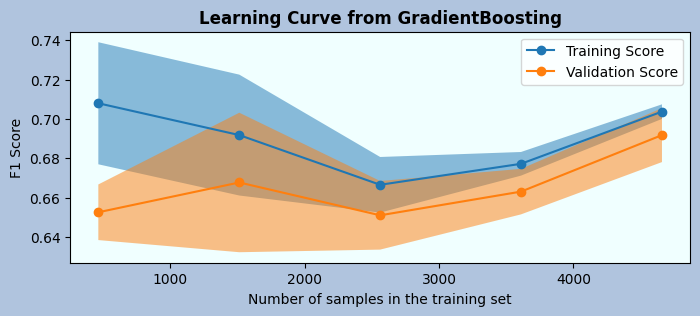

In [183]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 3))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {'marker': 'o'},
    "score_name": f1_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(best_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='upper right')
ax.set_title(f'Learning Curve from GradientBoosting', fontweight='bold')
ax.set_ylabel('F1 Score')

# Show the plot
plt.gca().set_facecolor('azure')
plt.gcf().set_facecolor('lightsteelblue')
plt.show()

>**Insight**

 - Pada learning curve di atas menunjukkan bahwa training score menurun seiring dengan meningkatnya validation score lalu kedua score bergerak secara beriringan, ini menunjukkan bahwa model mulai generalisasi dengan baik dan mengurangi overfitting ditambah dengan data yang diolah memiliki perbedaan keseimbangan yang tidak signifikan (balance). Saat model dilatih dengan lebih banyak data, model mulai menangkap pola yang lebih umum daripada menghafal data pelatihan, yang mengakibatkan sedikit penurunan training score tetapi peningkatan validation score. Ini adalah indikasi bahwa model stabil dan mampu menangani data yang tidak terlihat dengan lebih baik. [Sumber](https://scikit-learn.org/stable/modules/learning_curve.html)

> **Feature Importances**

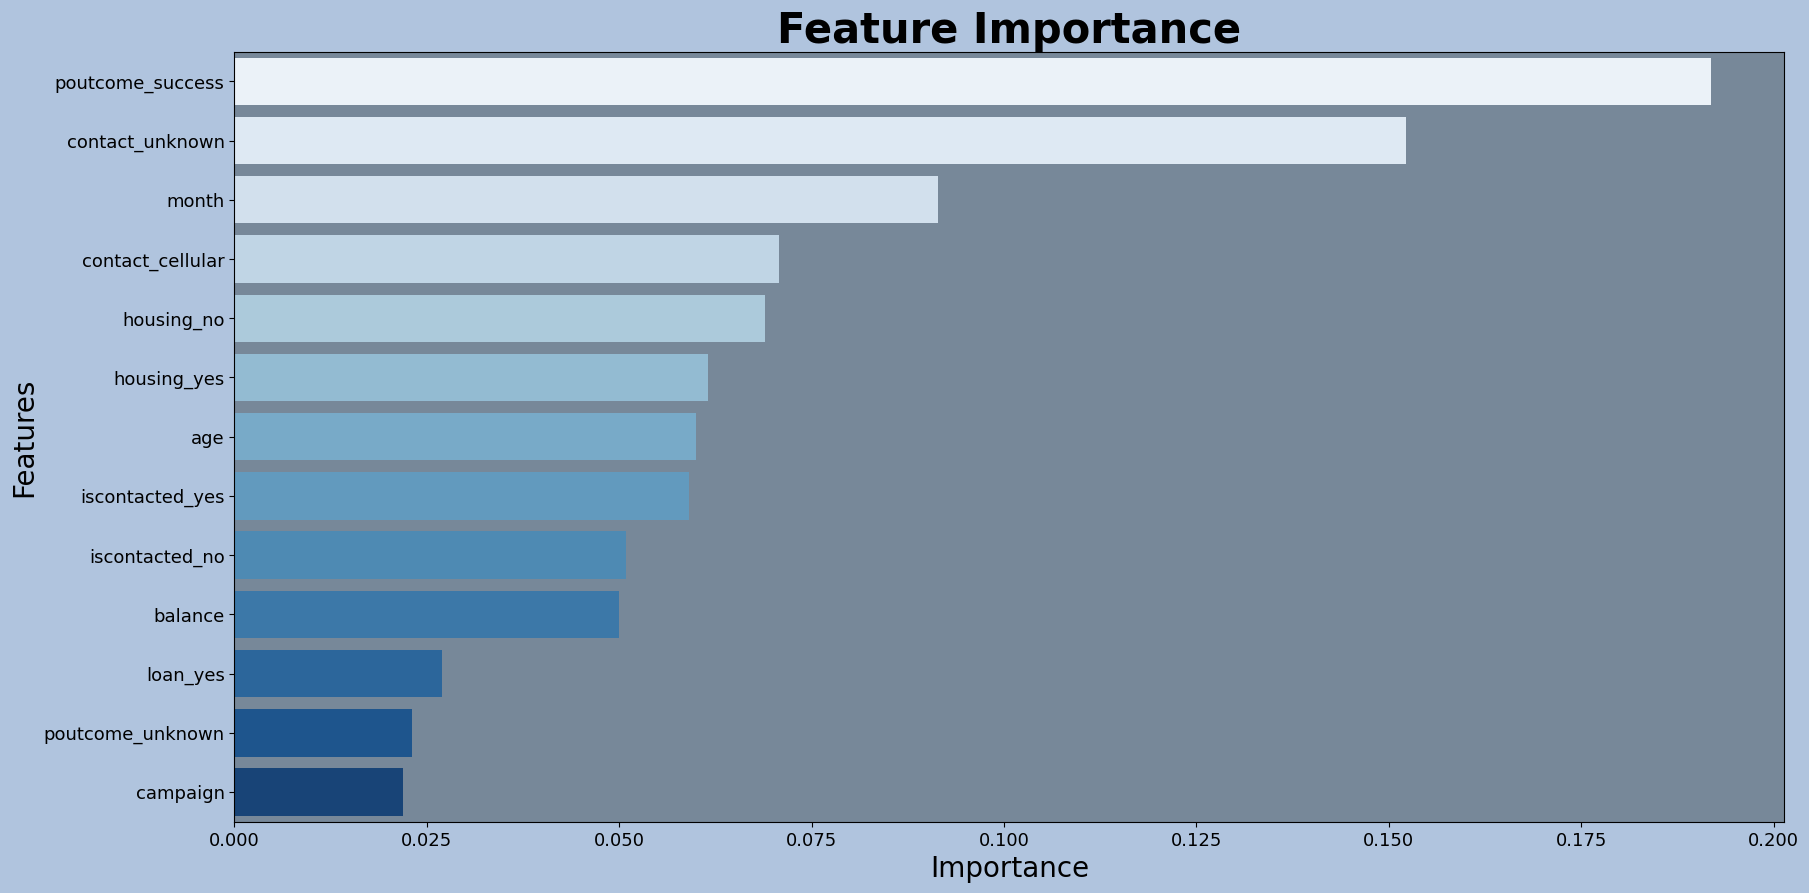

In [184]:
features = []

for n_transform, (_, transformer, columns) in enumerate(encode.transformers_):

    if transformer == 'passthrough':
        features += list(X_train.columns[columns])
    else:
        features += list(transformer.get_feature_names_out())

def feature_importance():                                
    n_features = len(features)
    feature_df = pd.DataFrame({
        'importance': best_model['model'].feature_importances_,
        'features': features
    }).sort_values(by='importance', ascending=False).head(n_features)
    feature_df.reset_index(drop=True, inplace=True)
    feature_df.index += 1

    plt.figure(figsize=(20,10))
    sns.barplot(data=feature_df.head(13), x='importance', y='features', palette='Blues')
    plt.xticks(fontsize=13)
    plt.xlabel('Importance', fontsize=20)
    plt.yticks(fontsize=13)
    plt.ylabel('Features', fontsize=20)
    plt.title('Feature Importance', fontsize=30, fontweight='bold')
    plt.gca().set_facecolor('lightslategray')
    plt.gcf().set_facecolor('lightsteelblue')
    plt.show()

feature_importance()

>**Insight**

Feature importance yang dihasilkan oleh model yang telah kita buat menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi model. Berikut adalah hasil analisis dari setiap fitur yang telah diurutkan dari yang penting untuk Machine Learning ini:

| Fitur/kolom | Deskripsi |
| --- | --- |
| poutcome | Nasabah yang berhasil melakukan deposit sebelumnya memiliki kemungkinan besar untuk melakukannya lagi. Ini menunjukkan pentingnya memiliki riwayat positif dalam kampanye sebelumnya. |
| contact | Metode kontak yang tidak diketahui memiliki pengaruh signifikan. Ini mungkin menunjukkan adanya kelompok nasabah yang belum teridentifikasi metode kontak yang tepat sehingga perlu strategi kontak yang lebih personal dan terstruktur. Selain itu, Metode kontak melalui ponsel adalah salah satu metode yang efektif. Hal ini menunjukkan bahwa banyak nasabah yang merespons lebih baik terhadap panggilan telepon. |
| month | Dapat diartikan terdapat pola perilaku musiman atau waktu tertentu ketika nasabah dihubungi lebih mungkin untuk membuat keputusan deposit atau tidak. |
| housing | Kepemilikan rumah juga merupakan faktor penting. Nasabah yang memiliki rumah atau tidak memiliki rumah menunjukkan pola perilaku yang berbeda terkait dengan keputusan keuangan mereka. |
| age | Usia nasabah juga merupakan faktor yang berpengaruh. Ini menunjukkan bahwa kelompok usia tertentu mungkin lebih responsif terhadap campaign. |
| iscontacted | Nasabah yang sudah pernah dihubungi sebelumnya juga menunjukkan pola perilaku yang signifikan. |
| balance | Saldo bank nasabah mempengaruhi keputusan mereka. Nasabah dengan saldo yang lebih tinggi mungkin lebih cenderung merespons positif. |
| loan | Nasabah yang memiliki pinjaman menunjukkan pola perilaku yang berbeda dalam hal keuangan.|
| poutcome | Hasil kampanye yang tidak diketahui menunjukkan bahwa ada nasabah yang hasil kampanye sebelumnya tidak tercatat dengan baik. |
| campaign | Jumlah kontak yang dilakukan selama kampanye juga mempengaruhi hasil. |

 Dari analisis di atas, kita dapat mengembangkan strategi bisnis yang lebih terarah dan efektif dengan memanfaatkan fitur-fitur yang memiliki pengaruh signifikan terhadap prediksi hasil campaign.

#### **Shapley Value of Explanations (SHAP) Per Observation Feature**

In [185]:
# membuat feature yang telah di preprocessing
X_train_processed = best_model[0:-2].fit_transform(X_train)

 96%|=================== | 5603/5824 [00:20<00:00]       

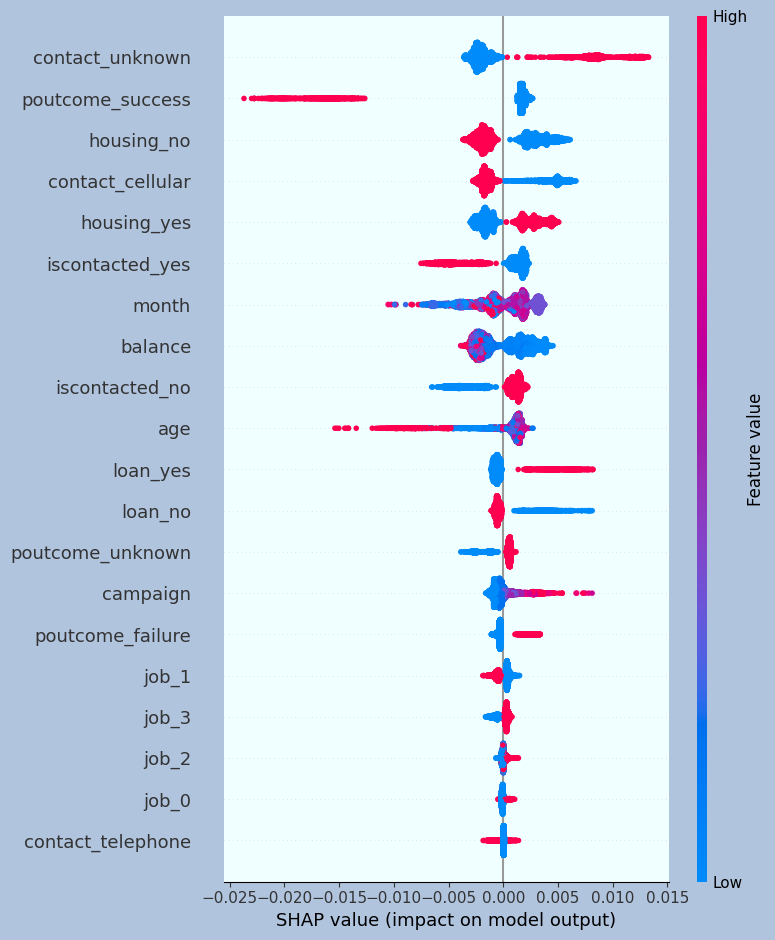

In [186]:
import shap

# Fit the pipeline to the training data
best_model.fit(X_train, y_train)

# Transform the training data using the fitted pipeline
X_train_transformed = best_model[:-1].transform(X_train)

# Get feature names after preprocessing
encoded_columns = best_model.named_steps['preprocessing'].transformers_[0][1].get_feature_names_out()
binary_columns = best_model.named_steps['preprocessing'].transformers_[1][1].get_feature_names_out()
ordinal_columns = best_model.named_steps['preprocessing'].transformers_[2][1].get_feature_names_out()
remainder_columns = X_train.columns[best_model.named_steps['preprocessing'].transformers_[3][2]]

# Combine all feature names
feature_names = np.concatenate([encoded_columns, binary_columns, ordinal_columns, remainder_columns])

# Initialize the SHAP explainer using the trained model
explainer = shap.Explainer(best_model.named_steps['model'], X_train_transformed, feature_perturbation="interventional", model_output="probability")

# Calculate SHAP values
shap_values = explainer(X_train_transformed)

# Plot the summary plot
plt.gca().set_facecolor('azure')
plt.gcf().set_facecolor('lightsteelblue')
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

>**Insight**

 Plot SHAP di atas menunjukkan pengaruh masing-masing fitur terhadap prediksi model machine learning untuk campaign marketing bank, memisahkan antara kelas positif (tidak deposit) dan kelas negatif (deposit). Plot tersebut menunjukan arah feature dimana jika arah semakin kanan (positif) berarti nasabah cenduerung tidak deposit, jika arahnya ke kiri (negatif) berarti nasabah cenderung deposit. Untuk melihat tingkat frekuensinya kita dapat melihat berdasarkan warna, biru berarti rendah dan merah berarti tinggi.
 
 Berdasarkan SHAP value, kita dapat melihat bahwa fitur yang paling penting diantaranya:
   - contact
   - poutcome
   - housing
   - iscontacted
   - month
   - balance
   
   Hal ini terlihat sedikit berbeda urutannya dengan hasil berdasarkan feature importance.


1. **contact_unknown**:
   - Nasabah yang dihubungi melalui metode selain telepon atau seluler cenderung tidak melakukan deposit (pengaruh positif pada kelas tidak deposit).

2. **poutcome_success**:
   - Keberhasilan campaign sebelumnya sangat meningkatkan kemungkinan nasabah melakukan deposit (pengaruh negatif pada kelas tidak deposit).

3. **housing_no dan housing_yes**:
   - Nasabah yang tidak memiliki pinjaman perumahan (housing_no) sedikit lebih mungkin untuk melakukan deposit (pengaruh negatif pada kelas tidak deposit).
   - Memiliki pinjaman perumahan (housing_yes) juga menunjukkan pengaruh yang beragam, tetapi cenderung meningkatkan kemungkinan deposit.

4. **contact_cellular**:
   - Kontak melalui seluler cenderung menurunkan kemungkinan nasabah melakukan deposit (pengaruh positif pada kelas tidak deposit).

5. **balance**:
   - Nasabah dengan saldo rekening tinggi cenderung tidak melakukan deposit (pengaruh positif pada kelas tidak deposit).

6. **month**:
   - Tidak ada tren yang jelas terkait bulan dengan prediksi deposit atau tidak, menunjukkan bahwa waktu dalam tahun mungkin tidak terlalu berpengaruh.

7. **iscontacted_no dan iscontacted_yes**:
   - Nasabah yang belum pernah dihubungi sebelumnya (iscontacted_no) lebih cenderung melakukan deposit (pengaruh negatif pada kelas tidak deposit).
   - Nasabah yang sudah dihubungi sebelumnya (iscontacted_yes) menunjukkan variasi pengaruh, tetapi cenderung sedikit mengurangi kemungkinan deposit.

8. **age**:
   - Usia tertentu memiliki pengaruh positif atau negatif, tergantung pada nilai spesifik usia tersebut.

9. **loan_no dan loan_yes**:
   - Nasabah tanpa pinjaman (loan_no) cenderung lebih mungkin melakukan deposit (pengaruh negatif pada kelas tidak deposit).
   - Nasabah dengan pinjaman (loan_yes) cenderung tidak melakukan deposit (pengaruh positif pada kelas tidak deposit).

10. **poutcome_unknown dan poutcome_failure**:
    - Hasil campaign sebelumnya yang tidak diketahui (poutcome_unknown) dan gagal (poutcome_failure) cenderung menurunkan kemungkinan nasabah melakukan deposit (pengaruh positif pada kelas tidak deposit).

 Fitur lainnya (job_0, job_1, job_2, job_3, contact_telephone, campaign) memiliki pengaruh yang lebih kecil dan bervariasi, menunjukkan bahwa pengaruh mereka terhadap prediksi model tidak terlalu signifikan.

 Secara keseluruhan, faktor utama yang mempengaruhi keputusan nasabah untuk melakukan deposit atau tidak termasuk metode kontak, hasil campaign sebelumnya, status pinjaman perumahan, dan saldo rekening. Bank dapat menggunakan informasi ini untuk menyusun strategi campaign yang lebih efektif, seperti menargetkan nasabah dengan saldo lebih rendah, menggunakan metode kontak yang lebih efisien, dan memanfaatkan data campaign sebelumnya untuk meningkatkan hasil.

In [187]:
# Start js (must have)
shap.initjs()

In [188]:
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [189]:
# membuat dataframe X_test yang telah di preprocessing
X_test_processed = best_model[0:-1].fit_transform(X_test)

In [190]:
# Fit the pipeline to the training data
best_model.fit(X_train, y_train)

# Transform the training and test data using the fitted pipeline
X_train_transformed = best_model[:-1].transform(X_train)
X_test_transformed = best_model[:-1].transform(X_test)

# Get feature names after preprocessing
encoded_columns = best_model.named_steps['preprocessing'].transformers_[0][1].get_feature_names_out()
binary_columns = best_model.named_steps['preprocessing'].transformers_[1][1].get_feature_names_out()
ordinal_columns = best_model.named_steps['preprocessing'].transformers_[2][1].get_feature_names_out()
remainder_columns = X_train.columns[best_model.named_steps['preprocessing'].transformers_[3][2]]

# Combine all feature names
feature_names = np.concatenate([encoded_columns, binary_columns, ordinal_columns, remainder_columns])

In [191]:
X_train_transformed = best_model['preprocessing'].transform(X)

>**Explainable SHAP terhadap nasabah dengan index ke-0**

The prediction must predict this customer is: Not Deposit from y_test


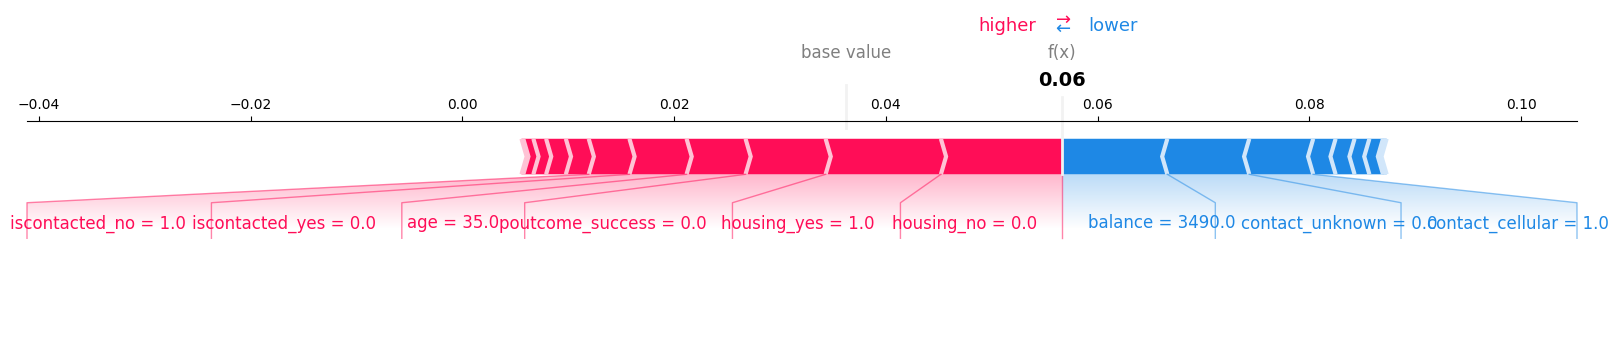

In [192]:
# Fit the best_model
best_model.fit(X_train, y_train)

# Transform the training and test data
X_train_transformed = best_model['preprocessing'].transform(X_train)
X_test_transformed = best_model['preprocessing'].transform(X_test)

# Convert transformed data back to DataFrame with proper feature names
feature_names = (
    list(best_model['preprocessing'].transformers_[0][1].get_feature_names_out(['housing', 'loan', 'contact', 'iscontacted', 'poutcome'])) +
    list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out(['job'])) +
    ['month', 'age', 'balance', 'campaign']
)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Initialize the SHAP explainer using the trained model
explainer = shap.Explainer(best_model.named_steps['model'], X_train_transformed_df)

# Calculate SHAP values for the test set
shap_values = explainer(X_test_transformed_df)

# Function to plot SHAP values for a specific instance
def shap_plot(instance_index, shap_values, X_test_transformed_df):
    # Ensure the instance_index is within the range of X_test_transformed_df
    if instance_index >= len(X_test_transformed_df):
        raise ValueError(f"Instance index {instance_index} is out of bounds for the provided dataset.")
    
    # Plot the SHAP values for the specified instance
    shap.force_plot(explainer.expected_value, shap_values[instance_index].values, 
                    features=X_test_transformed_df.iloc[instance_index], feature_names=feature_names, matplotlib=True)

# Print the real result
print(f"The prediction must predict this customer is: {('Deposit' if y_test.iloc[0] == 1 else 'Not Deposit')} from y_test")

# Plot SHAP values for the first instance in the test set
shap_plot(0, shap_values, X_test_transformed_df)

>**Insight**
Berikut merupakan analisis yang diberikan merupakan hasil dari grafik di atas, yang bertujuan untuk menjelaskan kontribusi masing-masing fitur terhadap prediksi model terhadap nasabah index ke-0:
1. **iscontacted_no = 1.0**:
   - Nasabah yang tidak pernah dihubungi sebelumnya memiliki pengaruh positif yang cukup signifikan terhadap prediksi model bahwa mereka akan melakukan deposit.
   
2. **age = 35.0**:
   - Usia 35 tahun juga memberikan pengaruh positif terhadap kemungkinan nasabah melakukan deposit. Ini mungkin menunjukkan bahwa nasabah di usia ini lebih cenderung untuk melakukan deposit.

3. **poutcome_success = 0.0**:
   - Hasil campaign sebelumnya yang sukses memiliki pengaruh positif terhadap prediksi, meskipun tidak sebesar fitur lainnya.

4. **housing_yes = 1.0**:
   - Nasabah yang memiliki pinjaman perumahan menunjukkan sedikit peningkatan dalam kemungkinan mereka akan melakukan deposit.

5. **balance = 3490.0**:
   - Saldo rekening yang tinggi (sebesar 3490) memiliki pengaruh negatif yang signifikan terhadap kemungkinan nasabah akan melakukan deposit. Nasabah dengan saldo yang besar mungkin merasa mereka sudah memiliki cukup dana.

6. **contact_unknown = 0.0 dan contact_cellular = 1.0**:
   - Metode kontak menggunakan seluler memiliki pengaruh negatif terhadap kemungkinan nasabah melakukan deposit, sedangkan metode kontak lain (selain telepon seluler) juga menunjukkan pengaruh negatif. Ini mungkin mengindikasikan bahwa kontak melalui seluler dan metode lain kurang efektif dalam mendorong nasabah untuk melakukan deposit.

 Secara keseluruhan, grafik ini menunjukkan bahwa:
 - **Tidak pernah dihubungi sebelumnya** dan **usia 35 tahun** adalah faktor-faktor yang mendorong kemungkinan nasabah melakukan deposit.
 - **Saldo rekening yang tinggi** dan **kontak melalui seluler atau metode lain** mengurangi kemungkinan nasabah untuk melakukan deposit.

#### **Local Interpretable Model-agnostic Explanation (LIME) - Explain Feature based on Pyplot** 

>**Explainable LIME terhadap nasabah dengan index ke-0**

The prediction must predict this customer is: Deposit from y_test


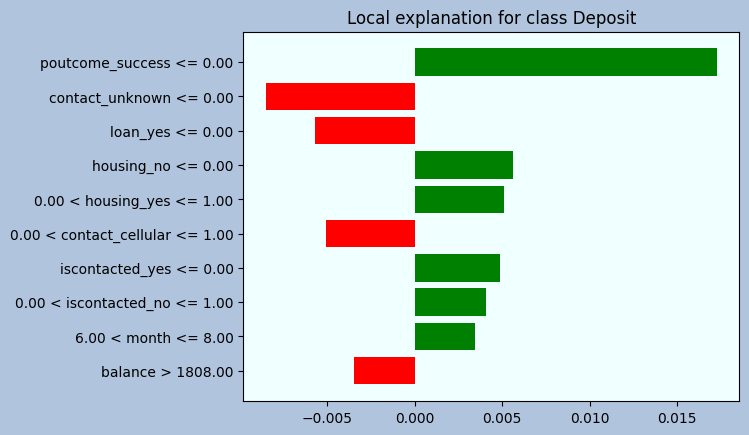

In [193]:
import lime
from lime import lime_tabular

# Fit the best_model
best_model.fit(X_train, y_train)

# Transform the training and test data
X_train_transformed = best_model['preprocessing'].transform(X_train)
X_test_transformed = best_model['preprocessing'].transform(X_test)

# Convert transformed data back to DataFrame with proper feature names
feature_names = (
    list(best_model['preprocessing'].transformers_[0][1].get_feature_names_out(['housing', 'loan', 'contact', 'iscontacted', 'poutcome'])) +
    list(best_model['preprocessing'].transformers_[1][1].get_feature_names_out(['job'])) +
    ['month', 'age', 'balance', 'campaign']
)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Explainer based on the processed training data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_transformed_df.values,
    feature_names=feature_names,
    class_names=['Not Deposit', 'Deposit'],
    mode='classification'
)

# Try to the observation 0
# Lets compare with the real result
print(f"The prediction must predict this customer is: {('Deposit' if y_test.iloc[0] == 0 else 'Not Deposit')} from y_test")

exp = explainer.explain_instance(X_test_transformed_df.iloc[0], 
                                 best_model.named_steps['model'].predict_proba, 
                                 num_features=10)

exp.as_pyplot_figure()
plt.gca().set_facecolor('azure')
plt.gcf().set_facecolor('lightsteelblue')

>**Insight**

 Berikut merupakan analisis yang diberikan merupakan hasil dari grafik di atas, yang bertujuan untuk menjelaskan kontribusi masing-masing fitur terhadap prediksi model terhadap nasabah index ke-0:

1. **poutcome_success**:
   - Pada nasabah index ke 0, hasil campaign sebelumnya berhasil, ini secara signifikan meningkatkan kemungkinan nasabah akan melakukan deposit. Hal ini menunjukkan bahwa nasabah yang telah berhasil dihubungi dan berpartisipasi dalam campaign sebelumnya cenderung lebih responsif.

2. **contact_other**:
   - Kontak melalui metode lain (selain telepon atau seluler) menurunkan kemungkinan nasabah akan melakukan deposit. Ini mungkin menunjukkan bahwa metode kontak ini kurang efektif.

3. **housing_no** dan **housing_yes**:
   - Nasabah yang tidak memiliki pinjaman perumahan sedikit lebih mungkin untuk melakukan deposit. Ini bisa jadi karena mereka memiliki beban finansial yang lebih rendah.
   - Sebaliknya, nasabah yang memiliki pinjaman perumahan juga cenderung sedikit lebih mungkin untuk melakukan deposit. Ini mungkin menunjukkan adanya kebutuhan untuk mengelola dan mengamankan lebih banyak dana.

4. **contact_cellular**:
   - Kontak melalui seluler sedikit menurunkan kemungkinan nasabah akan melakukan deposit. Ini mungkin karena panggilan seluler kurang diterima atau dianggap mengganggu.

6. **loan_yes**:
   - Nasabah memiliki pinjaman pribadi sedikit menurunkan kemungkinan untuk melakukan deposit, mungkin karena mereka sudah memiliki komitmen finansial yang lain.

7. **iscontacted_no** dan **iscontacted_yes**:
   - Nasabah tidak pernah dihubungi sebelumnya sedikit lebih mungkin untuk melakukan deposit. Ini mungkin karena mereka baru pertama kali menerima penawaran dan lebih tertarik.
   - Nasabah sudah dihubungi sebelumnya juga menunjukkan sedikit peningkatan kemungkinan untuk melakukan deposit, mungkin karena mereka sudah familiar dengan campaign bank.

8. **balance > 1808.00**:
   - Nasabah memiliki saldo di atas 1808.00 sedikit kurang mungkin untuk melakukan deposit. Ini bisa jadi karena mereka merasa sudah memiliki cukup dana di rekening mereka.

9. **month (6.00 < month <= 8.0)**:
    - Campaign yang dilakukan antara bulan Juni dan Agustus sedikit lebih mungkin berhasil. Ini bisa terkait dengan musim atau periode tertentu dalam setahun yang lebih kondusif untuk campaign marketing.

 Secara keseluruhan, hasil LIME ini memberikan wawasan yang berguna tentang faktor-faktor yang mempengaruhi keputusan nasabah dengan index ke-0 untuk melakukan deposit. Bank dapat menggunakan informasi ini untuk mengoptimalkan strategi camoaign mereka, misalnya dengan lebih fokus pada nasabah yang telah berhasil dihubungi sebelumnya atau memilih periode campaign yang lebih efektif.

#### **Confussion Matrix**

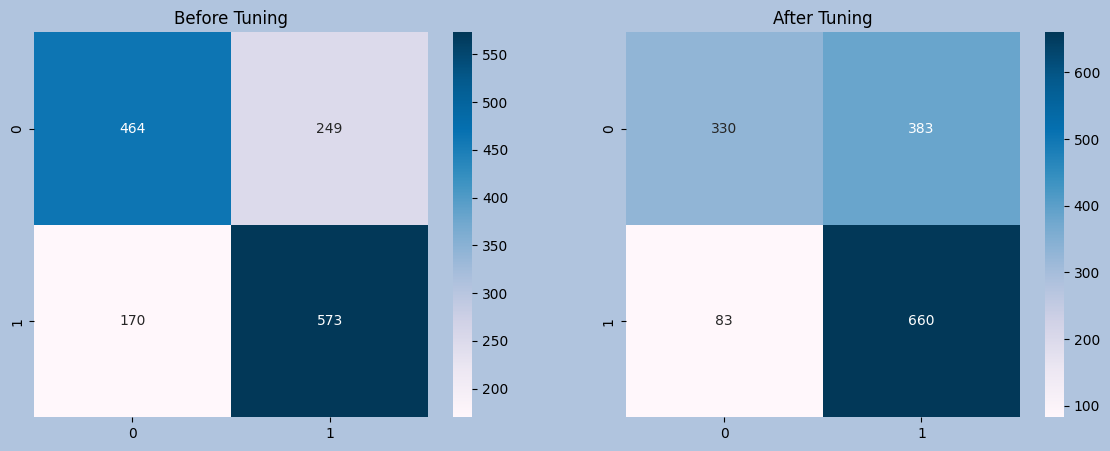

In [194]:
plt.figure(figsize=(14,5))

plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', cmap='PuBu')
plt.title('Before Tuning')

plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='.0f', cmap='PuBu')
plt.title('After Tuning')

plt.gcf().set_facecolor('lightsteelblue')
plt.show()

> **Insight**

$$\ \text{Precision} = \frac{TP}{TP + FP} \$$

$$\ \text{Recall} = \frac{TP}{TP + FN} \$$

$$\ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \$$


**Perhitungan F1 Score (Sebelum dan Sesudah)**

**Sebelum Modeling**:
$$\ \text{Precision} = \frac{573}{573 + 249} \approx 0.697 \$$
$$\ \text{Recall} = \frac{573}{573 + 170} \approx 0.771 \$$
$$\ \text{F1 Score} = 2 \times \frac{0.697 \times 0.771}{0.697 + 0.771} \approx 0.732 \$$


**Setelah Modeling**:
$$\ \text{Precision} = \frac{660}{660 + 383} \approx 0.633 \$$
$$\ \text{Recall} = \frac{660}{660 + 83} \approx 0.889 \$$
$$\ \text{F1 Score} = 2 \times \frac{0.633 \times 0.889}{0.633 + 0.889} \approx 0.739\$$


**Precision**:

 - Precision menurun dari 0.697 menjadi 0.633, yang menunjukkan bahwa ada peningkatan jumlah False Positive (dari 249 menjadi 383). Artinya, lebih banyak nasabah yang diprediksi tidak akan melakukan deposito padahal sebenarnya mereka tidak akan.

**Recall**:
 - Setelah tuning dengan Gradient Boosting, recall meningkat signifikan dari 0.771 menjadi 0.889. Ini menunjukkan bahwa model lebih baik dalam mendeteksi nasabah yang benar-benar tidak akan melakukan deposito (mengurangi False Negative dari 170 menjadi 83).

**F1 Score**:
 - F1 Score meningkat sedikit dari 0.732 menjadi 0.739. Ini menunjukkan bahwa model setelah tuning memiliki keseimbangan yang sedikit lebih baik antara precision dan recall.

Setelah tuning dengan Gradient Boosting, model lebih agresif dalam mendeteksi nasabah yang tidak akan melakukan deposito, mengurangi jumlah False Negative secara signifikan. Namun, terdapat trade-off berupa peningkatan jumlah False Positive. Secara keseluruhan, peningkatan F1 Score menunjukkan bahwa model memiliki keseimbangan yang lebih baik antara precision dan recall setelah tuning, meskipun ada kenaikan pada precision.

---

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah nasabah yang aktualnya tidak deposit dan diprediksi tidak deposit (True Positive) : 660 nasabah
- Jumlah nasabah yang aktualnya tidak deposit tetapi diprediksi deposit (False Negative) : 83 nasabah
- Jumlah nasabah yang aktualnya deposit dan diprediksi deposit (True Negative) : 330 nasabah
- Jumlah nasabah yang aktualnya deposit tetapi diprediksi tidak deposit (False Positive) : 383 nasabah
---

#### **Cost Benefit Analysis**

Untuk melakukan perbandingan persentase antara estimasi biaya tanpa model dan dengan model, kita akan menghitung persentase pengurangan biaya untuk Type I dan Type II. Berikut adalah rincian perhitungannya:

>**Cost Estimation Tanpa Model**

**Type I**
- Total nasabah tidak deposit: 743 nasabah
- Total campaign cost: 1456 x $4.77 = $6939.12 
- Total Potential loss: 743 x $4.77 = $3544.11

**Type II**
- Total potential loss of profit per nasabah: 743 x $43.59 = $32,387.37

>**Cost Estimation Dengan Model**

**Type I**
- False positive: 383 nasabah
- Total wasted campaign cost: 383 x $4.77 = $1,826.91
- Perbedaan dengan tanpa model: $3544.11 - $1826.91 = $1,717.20

**Type II**
- Total potential loss of profit per nasabah: (743–383) x $43.59 = $15,692.40
- Perbedaan dengan tanpa model: $32,387.37 - $15,692.40 = $16,694.97
---
**Perbandingan Persentase**

**Persentase Pengurangan Biaya Type I:**
$$\ \text{Persentase Pengurangan} = \left( \frac{3544.11 - 1826.91}{3544.11} \right) \times 100 \text{= 48.50}\% \$$

**Persentase Pengurangan Biaya Type II:**
$$\ \text{Persentase Pengurangan} = \left( \frac{32387.37 - 15692.40}{32387.37} \right) \times 100 \text{= 51.54}\% \$$

- **Type I**: Ada pengurangan biaya sekitar **48.50%** saat menggunakan model dibandingkan tanpa model.
- **Type II**: Ada pengurangan biaya sekitar **51.54%** saat menggunakan model dibandingkan tanpa model.


# **`Conclusion & Recommendation`**

#### **Conclusion**

>**Model**

- Metric utama yang kita guanakan adalah f1_score, karena kita mementingkan nilai rata-rata harmonik dari hasil akurasi recall dan precision,
- Berdasarkan hyperparameter tuning, parameter terbaik yang dapat digunakan untuk benchmark model GradientBoostingClassifier adalah :
    - {model__n_estimators': 100, 'model__min_samples_split': 10, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 6, 'model__learning_rate': 0.001}
- Berdasarkan Feature Importance yang dihasilkan oleh model, berikut merupakan feature yang penting untuk model ini:
    - poutcome
    - contact
    - month
    - housing
    - age
    - iscontacted (pdays)
    - balance
    - campaign
- Model berhasil meminimalisir kesalahan prediksi terhadap nasabah yang diprediksi deposit padahal aktualnya tidak deposit. 

>**Interpretation Result**
 - **poutcome**: Nasabah yang berhasil dalam campaign sebelumnya lebih mungkin melakukan deposit saat ini, menunjukkan pentingnya data historis.
 - **contact**: Metode kontak selain telepon atau seluler mengurangi kemungkinan deposit, menekankan pentingnya metode kontak yang efektif.
 - **housing**: Nasabah dengan pinjaman perumahan juga sedikit lebih mungkin melakukan deposit, mungkin karena kebutuhan pengelolaan keuangan yang lebih hati-hati.
 - **loan**: Nasabah dengan pinjaman pribadi sedikit kurang mungkin melakukan deposit, menunjukkan beban finansial yang mengurangi kemampuan menambah deposit.
 - **iscontacted**: Nasabah yang belum pernah dihubungi lebih mungkin melakukan deposit, menunjukkan efektivitas targeting nasabah baru.
 - **balance**: Nasabah dengan saldo tinggi sedikit kurang mungkin melakukan deposit, mungkin karena merasa sudah memiliki cukup dana.
 - **month**: Campaign antara Juni dan Agustus lebih mungkin berhasil, menunjukkan waktu tertentu dalam setahun lebih kondusif untuk campaign.

>**Cost Benefit Result**

 **Type I**

 - **Tanpa Model**: Biaya campaign yang dihabiskan untuk nasabah yang tidak melakukan deposit adalah $3544.11.
 - **Dengan Model**: Biaya yang terbuang untuk campaign berkurang menjadi $1826.91.
 - **Pengurangan Biaya**: Menggunakan model mengurangi biaya campaign yang terbuang sebesar $1717.20, yang setara dengan pengurangan biaya sekitar 48.50%.

 **Type II**

 - **Tanpa Model**: Potensi kerugian keuntungan dari nasabah yang tidak melakukan deposit adalah $32,387.37.
 - **Dengan Model**: Potensi kerugian berkurang menjadi $15,692.40.
 - **Pengurangan Biaya**: Menggunakan model mengurangi potensi kerugian keuntungan sebesar $16,694.97, yang setara dengan pengurangan biaya sekitar 51.54%.

>**Model Limitiation**

 Feature yang valid dalam model ini:
 - **age**: 22 sampai dengan 77 tahun 
 - **balance**: 0 sampai dengan $13,578
 - **campaign**: 1 sampai dengan 13 kali
 - **job**: admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed
 - **housing**: yes, no   
 - **loan**: yes, no
 - **contact**: cellular, telephone, unknown
 - **month**: jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec
 - **iscontacted**: yes, no
 - **poutcome**: success, failure, unknown

 Target yang valid pada model ini:
 - **deposit**: 0 -> yes, 1 -> no    

#### **Recommendation**

>**Model Machine Learning**:

Rekomendasi yang bisa diberikan terhadap model untuk mengembangkan Machine Learning agar lebih baik lagi diantaranya:
 - Lakukan pembaharuan, dikarenakan nilai deposit interest rate dan kurs selalu berubah-ubah seiring berkembangnya zaman,
 - Eksplorasi algoritma model yang berbeda untuk mengembangkan model,
 - Menambahkan fitur baru berupa segmentasi user/nasabah (misalnya segmentasi usia, status nikah, jenis kelamin, dan lain-lain)

>**Bank**:

Rekomendasi yang bisa diberikan terhadap Bank ABC untuk mengembangkan campaign agar lebih baik lagi diantaranya:

 - **Data Historis Campaign**: Memanfaatkan data hasil campaign sebelumnya, terutama kesuksesan, adalah kunci dalam memprediksi dan meningkatkan respons positif.
 - **Metode Kontak**: Memilih metode kontak yang efektif sangat penting. Menghindari metode kontak yang kurang efektif dapat meningkatkan kemungkinan keberhasilan.
 - **Profil Keuangan Nasabah**: Memahami beban finansial nasabah, seperti pinjaman KPR atau pribadi, serta saldo rekening, dapat membantu dalam menargetkan nasabah yang lebih mungkin melakukan deposit.
 - **Waktu Campaign**: Melakukan campaign pada periode tertentu yang lebih kondusif dapat meningkatkan keberhasilan.
 - **Saldo Nasabah**: Fokuskan upaya campaign pada nasabah dengan saldo yang lebih tinggi karena mereka menunjukkan sedikit kecenderungan lebih besar untuk melakukan deposit.
 - **Frekuensi kontak**: Hindari menghubungi nasabah terlalu sering, karena ini bisa berdampak negatif. Lebih baik melakukan interaksi yang lebih bermakna dan relevan.
 - **Usia**: Karena usia tidak memiliki pengaruh yang signifikan, campaign dapat lebih disesuaikan dengan preferensi keuangan dan perilaku nasabah daripada usia mereka.
 - **Status Campaign**: Fokus dan lebih diperhatikan lagi status campaign yang telah dilakukan apakah berhasil atau tidak.

# **`Saving Model`**

In [195]:
import pickle

# Define final model
final_model = gb_tuning.best_estimator_

# Fitting model to all data
final_model.fit(X, y)

# Save Model
pickle.dump(final_model, open('gradboost_for_deposit.sav', 'wb'))